# Treść zadania

Twoim zadaniem jest przewidzieć cenę laptopa (kolumna buynow_price w zbiorze danych) na podstawie jego atrybutów. Przygotuj proszę model w notebooku jupyter, w języku python. Model będzie oceniony miarą RMSE na zbiorze testowym, dla którego nie udostępniamy prawdziwej ceny. Wynik poznasz po wysłaniu zadania, dlatego upewnij się proszę, czy Twój model nie jest przeuczony. 
Postaraj się, aby w notebooku był zachowany Twój tok myślowy. Dobrze, aby było widać każde podejście, nie tylko końcowe (np jeżeli testowałaś/eś kilka modeli możesz pokazać wszystkie). Zależy nam na tym, aby Twoja droga dojścia do finalnego modelu była czytelnie przedstawiona.  

Wejściowe zbiory danych: 
1. public-dataset.json - zbiór danych, na których możesz nauczyć Twój model (dostępny również w formacie pickle). JSON zapisany w formacie orient='columns' 
(​https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html​). 
2. hidden-Xs.json - zbiór danych, na których możesz dokonać predykcji Twoim modelem (dostępny również w formacie pickle). JSON zapisany w formacie orient='columns' 
(​https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html​) 

Wyślij proszę: 
1. Notebook z Twoją pracą 
2. Zbiór danych w formacie (Wartość indeksu, Twoja predykcja) na którym obliczymy finalne RMSE - w formacie JSON zgodnym z orient='columns' 
(​https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html​). 

# Podsumowanie


## Analiza wartości brakujących

W zbiorach występują braki danych od 0% do 12%. Najwięszy odsetek brakujących danych dotyczy zmiennych:
*  `taktowanie bazowe procesora (ghz)` 
*  `komunikacja` 
*  `typ pamięci ram` 

Obserwuje się max 13 braków per wiersz (na 17 zmiennych 13 nie jest wypełnionych). W przypadku zbioru aplikacyjnego (hidden) istnieje maksymalnie 14 wartości brakujących per wiersz (+ dodatkowy brak w zmiennej gwarancja). 

Podjęto decyzję o: 
- wprowadzeniu zmiennch binarnych indykujących brakujące wartości, 

> Każdej zmiennej stworzono flagę jeśli wystąpił brak danych znaczonych `zmienna_flg`

- wprowadzeniu zmiennej binarnej indykującej o braku wypełnienia w danyej obserwacji dla więcej niż 6,3 zmiennych

> Wprowadzono zmienną `>=6 nulli wiersz` jeśli obserwacja posiada ponad 6 braków oraz analogiczną zmienną `>=3 nulli wiersz`


## Zmienna objaśniana

* **buynow_price** 
  - obserwuje się asymetrię rozkładu zmiennej objaśnienej (prawostronną skośność) 
  - wykonano transformację funkcją logarytm


## Zmienne objaśniające

### Porównanie zbioru modelowego i aplikacyjnego

Różnice pomiędzy poziomami zmiennych pomiędzy zbiorem modelowym, a zbiorem aplikacyjnym: 
  - `rozdzielczość (piksele)` 
    - 3 poziomy więcej w zbiorze modelowym {'2560 x 1600', '2160 x 1440', '1920 x 1200'}
  - `liczba rdzeni procesora` 
    - 2 poziomy więcej w zbiorze modelowym {'6', '8'}
  - `wielkość pamięci ram` 
    - 2 poziomy więcej w zbiorze modelowym {'256 mb', '64 gb'}
  - `taktowanie bazowe procesora (ghz)` 
    - 3 poziomy w zbiorze aplikacyjnym, których nie ma w zbiorze modelowym {3.4, 2.17, 2.18}
    - 9 poziomów w zbiorze modelowym, których nie ma w zbiorze aplikacyjnym {0.0, 1.68, 1.46, 3.5, 3.6, 3.8, 1.15, 2.56, 1.66} 
  - `pojemność dysku (gb)` 
    - 4 poziomy w zbiorze aplikacyjnym, których nie ma w zbiorze modelowym {8192.0, 2.0, 168.0, 2015.0}
    - 17 poziomów w zbiorze modelowym, których nie ma w zbiorze aplikacyjnym {2048.0, 0.0, 1728.0, 608.0, 516.0, 740.0, 8.0, 524.0, 508.0, 10000.0, 2480.0, 275.0, 980.0, 1012.0, 248.0, 60.0, 990.0}
    
> wyłączenie poziomów dla liczby rdzeni procesora 6 oraz 8 zostało wykonane po dokonaniu binaryzacji zmiennych ostatni etap przygotowania danych do modelowania

### Outliery

Odstające wartości zmiennej celu mogą prowadzić do obiążenia modelu (obciążenie scoru w liściach w przypadku drzew, xgb czy też rf). Brak odfiltrowania outlierów na zmiennych egzogenicznych. 

### Analiza zmiennych objaśniających oraz imputacja braków danych

Przed dokonaniem analizy zmiennych objaśniających zbiór modelowy został podzielony na:
* zbiór treningowy (75%) - zbiór wykorzystanay do analiz oraz w późniejszym etapei od budowy/tunningu modelu 
* zbiór testowy (25%) - zbór wykorzystany do kalkulacji miary błędu modelu (RMSE)
> założono rozbicie holdout 80% do 20%, jednak ze względu na reprezentatywność zbiorów ustalono proporcje ok 75% do 25%

Analiza zmiennych objaśniających została przeprowadzona na zbiorze traningowym nie uwzględniając przy tym informacji z zbioru testowego. Dla każdego poziomu dostępnych zmiennych w zbiorze treningowym wyznczono podstawowe statystyki min, mean, p01, p25, median, p75, p99, max, count oraz wyznaczono histogramy zmiennej `buynow_price` (histogramy zostały wygenerowane po transformacji logarytmicznej). Nastęnie zmienne poddano inspekcji wizualnej, zaadresowano sposób poprawy jakości danych oraz wprowadzenia nowych zmiennych.

> wykonane kroki nie są jedynymi możliwymi do przygotowania zbioru do modelowania. Obecnie coraz popularniejsze staje sie wykorzystanie klas dostępnych w module sklearn.impute pakietu sklearn: 
* `SimpleImputer` 
* `IterativeImputer` (mozliwe udoskonalenie modelu o wykorzystanie modelowania do wyjaśnienia braków)
* `MissingIndicator` 
* `KNNImputer`    

> ze względu na ograniczenia czasowe oraz głównie dostępność zmiennych kategorycznych - nie zakładano tworzenia klas imputacyjnych (potrzeba przekodowywania zmiennych) oraz tworzenia Pipeline


Poniżej zawarto kroki podjęte w celu poprawy jakości danych dla każdej ze zmiennej:

1. `rodzaj karty graficznej` - wypełnienie braków danych wartością 'grafika zintegrowana'
*  `komunikacja` -  wypełnienie braków wartoścą \['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps'] oraz stowrzenie flag jeśi dany standard isnieje w rozważanej liście 
*  `rozdzielczość (piksele)` - wypełnienie braków danych wartością '1920 x 1080', pozostawienie wartości ['1920 x 1080','1366 x 768', '1600 x 900','3840 x 2160','1920 x 1280', '1280 x 800'] w przypadku pozostałych włączenie do klasy 'inna'
*  `liczba rdzeni procesora` - wypełnienie braków danych wartością 4, przypisanie wartości 4 jeśli jest 3 (głównie dla procesora i5, który nie posiada 3 rdzeni dodatkowo ceny urządzeń ze wskazaną liczbą 3 rdzeni jest zbliżona do 4-rdzeniowych jednostek
*  `wielkość pamięci ram` - konwersja GB na MB oraz imputacja wartością mediany ze zbioru treningowego 8192.0 (8 GB) jeśli pole nie jest wypełnione.
*  `system operacyjny`-iteracyjna kateogryzacja zmiennej (pozostawienie iteracyjne systemu jeśli istnieje w liście)
  - *windows 10 home* - dodaktowo wypełnienie jeśli występuje brak
  - *windows 10 professional*
  - *windows 7 professional 64-bit*
  - *windows 8.1 home 64-bit*
  - *brak systemu*    
  
  oraz wprowadzenie kategorii inny jeśli występuje inny system, dodatkowo przetestowano dołożenie zminnej ilości systemów oraz informacji czy jest 'professional', 'home', '10', '8', '7'
*  `typ dysku twardego` - wypełnienie braków wartością 'hdd'
*  `sterowanie` - stowrzenie flag jeśi dany sterowanie isnieje w rozważanej liście (tlko dla klawiatura podświetlana i numeryczna - espercko przyjęto, że touchpad i klawiatura nie powinny mieć wpływu na wartość komputera (modelowana jest cena/wartość komputera a ceny ofertowej).  
*  `multimedia`- stowrzenie flag jeśi dany sterowanie isnieje w rozważanej liście 
*  `typ pamięci ram `- wypełnienie braków wartością 'ddr3'
*  `taktowanie bazowe procesora (ghz)` - konwersja na wartość numeryczną, imputacja wartością mediany ze zbioru treningowego (2.5)
*  `seria procesora` - wypełnienie wartością 'intel core i3' oraz przetestowano 'intel core i5' i stworzenie zmiennych czy procesor jest 'amd', 'celeron' czy 'pentium'
*  `stan`- usunięto zminną ze względu na występowanie jednej wartości 'nowe'
*  `pojemność dysku (gb)` - zamiana wartości 10000 na 1000 (ekspercko) wypełnienie braków medianą ze zbioru treningowego o wartości 500 zamiana wartośći 0 na 500 (ekspercko).
*  `gwarancja` - wypełnienie braków wartością 'sprzedawcy'
*  `wielkość matrycy` - wypełenienie braków wartością 15" - 15.9"

W ostatnim kroku przeprowadzono one-hot-encoding. Wszystkich zmiennych kategorycznych. Proces powtórzono dla zbioru testowego oraz dla zbioru aplikacyjnego.

## Model 

Na zbiorze treningowym (75\%) przy wykorzystniu 3 zbiorowej walidacji krzyżowej i algorytmu MBO (model based optimization) do przeszukowaniu siatki (10 iteracji) dokonano tunningu hiperparametrów:
* 'n_estimators': (10, 150) - liczba drzew 
* 'max_depth': (15, 20) - maksymalna głębokość drzewa
* 'learning_rate': (0.001, 0.99, "log-uniform") - współczynnik uczenia 
* 'min_child_weight': (7, 11) - minimalna liczba obserwacji w liściu

modelu **xgBoost** otrzymując 
* ('learning_rate', 0.3313368845517676),
* ('max_depth', 17),
* ('min_child_weight', 10),
* ('n_estimators', 82)

Po wyznaczeniu optymalnych parametrów wykonano predykcje na zbiorze testowym osiągając RMSE na poziomie ok **560 PLN**.
W ostatnim kroku dokonano analiz otrzymanych predykcji na zbiorze aplikacyjnym, porównująć z wartościami na zbiorze testowym (na zagregowanych statysytkach modeli dopasowuje się przyzwoicie ze względu na wartości zmiennych jak i na braki danych). 

W ramach **interpreteacji parametrów modelu** wyznaczono wykresy shapleya:


<img src="shap.png"
     alt="Markdown Monster icon"/>

Główne obserwacje : 
* klawiatura podświetlana wpływa pozytywnie na cene
* procesor intel core i7 wpływa pozytywnie na cene
* zwrost ramu powoduje wzrost ceny 
* procesor intel core i5 wpływa pozytywnie na cene 
* wzrost taktowania procesora wpływa pozytywnie 
* 2 rdzenie wpływają negatywnie na cenę (wyższe ceny dla dopelnienia)
* rozdzielczość 1366 x 768 (HD ready) wpływa negatywnie (odwrotnie dopełnienie - zbiór posiada znaczną liczbę jednostek z rozdzielczością HD
* wzrost rozmiaru dysku odwyższa cenę 
* jeśli dysk jest typu ssd to cena komputera jest wyższa
* jeśli hdd to niższa
* jeśli system operacyjny jest w wersji professional jednostka ma wyższą cene
* ...
* gwarancja producenta podwyższa cenę 
* ...
* grafika zintegrowana obniża cenę
* ...

W ramach **stabilności parametrów modelu** wyznaczono wykresy shapleya dla zbioru testowego oraz przeprowadzono analizę wizualną czy zależności pomiędzy próbkami się nie zmieniają.

Istotne ograniczenia modelu: 
* złożoność, możliwe występowanie zależności o nieskiej intuicyjności 
* wrażliwość na podświetlenie klawiatury (wymagana jest pogłębiona analiza istnienia silnej zależności obserwowanej w danych) 
* brak odniesienia wyników do innych modeli (na przykład do random forest, LGBM, catboost, sieci neuronowej czy prostego modelu liniowego elastic net) 

Możliwe dalsze kroki:
* przygotowanie procesu imputacji + pipeline 
* wykonanie dodatkowego feature engeneereng
* stworzenie challengera
* ograniczenie modelu do najbardziej istotnych zmiennych 

# Import bibliotek i zbiorów

In [1]:
# biblioteki
import pandas as pd 
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
mpl.rcParams["figure.figsize"] = [6.4, 4.8]
%matplotlib inline

In [2]:
# zbiór modelowy 
dataset = pd.read_json("public-dataset.json") 
# out of sample (bez targetu)
hidden = pd.read_json("hidden-Xs.json") 

# Analiza danych

## Zbiory danych (typy, info, braki danych per wiersz i/lub kulumna)

In [3]:
# podstawowe informacje o danaych
print('Dataset: \n')
print(dataset.info())
#print(dataset1.info())
print('\nHidden: \n')
print(hidden.info())
dataset.columns

Dataset: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 70 to 5978
Data columns (total 17 columns):
buynow_price                         7853 non-null float64
rodzaj karty graficznej              7357 non-null object
komunikacja                          7071 non-null object
rozdzielczość (piksele)              7245 non-null object
liczba rdzeni procesora              7853 non-null object
wielkość pamięci ram                 7403 non-null object
system operacyjny                    7203 non-null object
typ dysku twardego                   7418 non-null object
sterowanie                           7175 non-null object
multimedia                           7145 non-null object
typ pamięci ram                      6989 non-null object
taktowanie bazowe procesora (ghz)    6917 non-null float64
seria procesora                      7320 non-null object
stan                                 7853 non-null object
pojemność dysku (gb)                 7372 non-null float64
gwarancj

Index(['buynow_price', 'rodzaj karty graficznej', 'komunikacja',
       'rozdzielczość (piksele)', 'liczba rdzeni procesora',
       'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
       'sterowanie', 'multimedia', 'typ pamięci ram',
       'taktowanie bazowe procesora (ghz)', 'seria procesora', 'stan',
       'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy '],
      dtype='object')

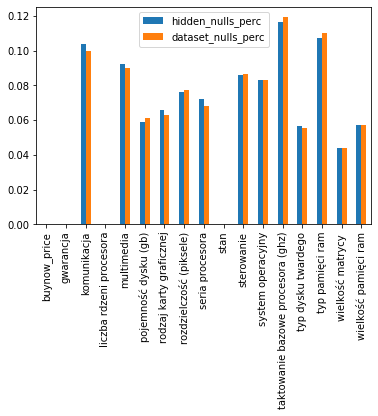

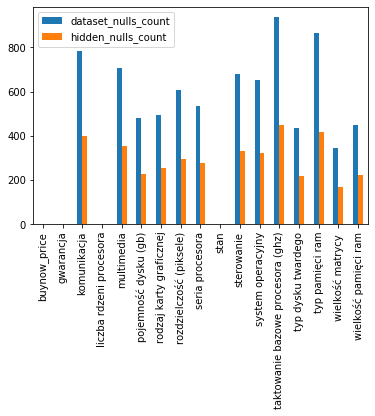

,dataset_nulls_count,dataset_nulls_perc,hidden_nulls_count,hidden_nulls_perc
buynow_price,0.0,0.000000,NaN,NaN
gwarancja,0.0,0.000000,1.0,0.000258
komunikacja,782.0,0.099580,401.0,0.103644
liczba rdzeni procesora,0.0,0.000000,1.0,0.000258
multimedia,708.0,0.090157,356.0,0.092013
pojemność dysku (gb),481.0,0.061250,228.0,0.058930
rodzaj karty graficznej,496.0,0.063161,255.0,0.065909
rozdzielczość (piksele),608.0,0.077423,294.0,0.075989
seria procesora,533.0,0.067872,278.0,0.071853
stan,0.0,0.000000,0.0,0.000000


In [4]:
# rozkład nulli per columna
NullsPerColumns = pd.concat([dataset.isnull().\
                            agg(['sum','mean']).T.\
                            rename({'sum': "dataset_nulls_count", "mean":"dataset_nulls_perc"},axis='columns'), \
                            hidden.isnull().agg(['sum','mean']).T.\
                            rename({'sum': "hidden_nulls_count", "mean":"hidden_nulls_perc"}, axis='columns')], axis =1, sort = True)

NullsPerColumns.loc[:, ['hidden_nulls_perc', 'dataset_nulls_perc'] ].plot(kind='bar')
plt.show()
NullsPerColumns.loc[:, ['dataset_nulls_count', 'hidden_nulls_count'] ].plot(kind='bar')
plt.show()

NullsPerColumns 
# występują braki danych od 5% do 10% per zmienna


In [5]:
def inspectNullsRowwise(dataset):
    # number of nulls per row
    CountNullRowwise = dataset.isnull().sum(axis=1)
    # aggregate by the number of nulls 
    CountNullRowwiseAggregated = CountNullRowwise.value_counts().sort_index().to_dict()
    # print(CountNullRowwiseAggregated)
    
    # create dictionary where: key - number of nulls in row, value - index pointer
    CountNullRowwiseAggregatedIndexes = dict()
    for key in CountNullRowwiseAggregated.keys():
        CountNullRowwiseAggregatedIndexes[key] = CountNullRowwise[CountNullRowwise == key].index
    
    nulls = dict()
    for key, indexes in CountNullRowwiseAggregatedIndexes.items():
        nulls[str(key) + "_nulls_in_row"] = dataset.loc[indexes,:].isnull().sum().append(pd.Series({'nrows':CountNullRowwiseAggregated[key]}))


    return CountNullRowwiseAggregatedIndexes, pd.concat(nulls, axis = 1).T

In [6]:
indexes, report = inspectNullsRowwise(dataset)
report

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy,nrows
0_nulls_in_row,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6109
1_nulls_in_row,0,60,83,75,0,1,70,23,7,22,122,115,132,0,23,0,22,755
2_nulls_in_row,0,35,26,14,0,3,28,37,26,8,112,102,10,0,24,0,5,215
3_nulls_in_row,0,12,38,16,0,3,7,5,28,31,25,38,4,0,10,0,2,73
4_nulls_in_row,0,6,10,8,0,3,4,6,29,7,35,30,3,0,5,0,18,41
5_nulls_in_row,0,7,60,53,0,2,27,1,79,76,23,81,6,0,5,0,5,85
6_nulls_in_row,0,4,29,24,0,8,23,3,31,27,18,35,3,0,5,0,0,35
7_nulls_in_row,0,7,31,16,0,14,17,3,30,32,28,31,4,0,9,0,2,32
8_nulls_in_row,0,21,138,36,0,111,117,5,140,140,134,137,22,0,114,0,5,140
9_nulls_in_row,0,59,74,72,0,16,70,61,15,72,74,73,61,0,15,0,4,74


In [7]:
indexes, report = inspectNullsRowwise(hidden)
report

,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy,nrows
0_nulls_in_row,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3029
1_nulls_in_row,33,56,28,0,1,27,17,6,9,53,47,68,0,7,0,19,371
2_nulls_in_row,15,13,6,0,2,5,11,19,9,37,41,9,0,9,0,0,88
3_nulls_in_row,2,10,8,0,4,8,4,7,10,13,23,0,0,6,0,1,32
4_nulls_in_row,3,5,3,0,0,2,2,10,3,12,13,3,0,3,0,9,17
5_nulls_in_row,4,23,23,0,0,6,0,27,26,8,28,1,0,2,0,2,30
6_nulls_in_row,4,15,10,0,1,12,2,16,16,10,16,4,0,2,0,0,18
7_nulls_in_row,3,14,8,0,7,13,1,16,17,16,17,3,0,3,0,1,17
8_nulls_in_row,15,79,23,0,65,67,3,81,80,81,80,14,0,59,0,1,81
9_nulls_in_row,39,45,44,0,5,43,40,9,45,44,45,39,0,6,0,1,45


## Zmiena objaśniana

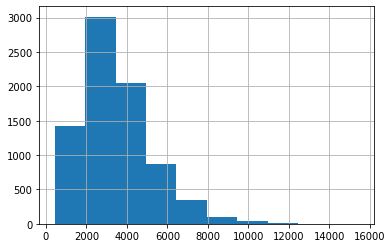

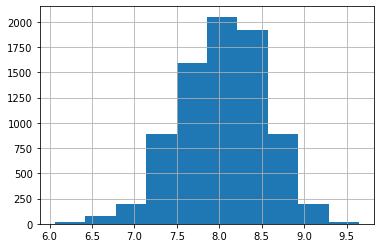

In [8]:
dataset.buynow_price.hist(); plt.show()
np.log(dataset.buynow_price).hist(); plt.show()


##  Zmienne objaśniające

In [9]:
# Analiza poziomów zmiennych w obu zbiorach 
# W przypadku gdy zbudujemy model na zmiennej - nie będzie możliwości predykcji (np w xgb, czy enet) bo będą missingi

def obtainVariablesLevels(setA, setB, vars_as_list = ['komunikacja', 'system operacyjny', 'sterowanie', 'multimedia']):
    "uwaga na stosowanie na dużych zbiorach bądź zmiennych ciągłych TODO: wyłączyć dla ciągłych"
    # słownik poziomów zmiennych z zbiorze A
    Alevels = dict()
    for var in setA.columns:
        if var in vars_as_list: 
            Alevels[var] = set([s for x in setA[var].values if x is not None for s in x])
        else:
            Alevels[var] = set(setA[var].astype(str).value_counts().index)
            
    # słownik poziomów zmiennych z zbiorze B
    Blevels = dict()
    for var in setB.columns:
        if var in vars_as_list: 
            Blevels[var] = set([s for x in setB[var].values if x is not None for s in x])
        else:
            Blevels[var] = set(setB[var].astype(str).value_counts().index)
    
    return Alevels, Blevels

dlevels, hlevels = obtainVariablesLevels(dataset, hidden)

print("Liczności: ")
for key, value in dlevels.items(): 
    if key in ['buynow_price','buynow_price_log']: 
        next
    else: 
        print(" -> " + key + "\n\tdataset: " + str(len(value)) + ", hidden : " + str(len(hlevels[key])))
 
print("\n Poziomy zmiennych")
for key, value in dlevels.items(): 
    if key in ['buynow_price','buynow_price_log']: 
        next
    else: 
        print("\n" + key + ":\n\t dataset: " + str(sorted(value)) + " \n\t hidden: " + str(sorted(hlevels[key])))

dhdiff = dict()
for key in hlevels.keys():
    print("\n" + key )
    dhdiff[key] = dlevels[key] - hlevels[key]
    print("\t-> Są w hidden, brak w dataset: " + str(hlevels[key] - dlevels[key]))
    print("\t-> Są w dataset, brak w hidden: " +str(dhdiff[key]))
    
# rodzaj karty graficznej: takie same poziomy w dataset i hidden
# komunikacja:  takie same poziomy
# rozdzielczość (piksele): {'2160 x 1440', '2560 x 1600', '1920 x 1200'} brak w hidden
# liczba rdzeni procesora: {'6', '8'} brak w hidden 
# wielkość pamięci ram: {'256 mb', '64 gb'} brak w hidden 
# system operacyjny: takie same poziomy
# typ dysku twardego: 5
# sterowanie: 4
# multimedia: 4
# typ pamięci ram: 3
# taktowanie bazowe procesora (ghz): {3.4, 2.17, 2.18} brak w dataset, {0.0, 1.68, 1.46, 3.5, 3.6, 3.8, 1.15, 2.56, 1.66} w hidden
# seria procesora: 18
# stan: 1
# pojemność dysku (gb): {8192.0, 2.0, 168.0, 2015.0} brak w dataset
#    {0.0, 1.68, 1.46, 3.5, 3.6, 3.8, 1.15, 2.56, 1.66} brak w hidden
# gwarancja: 3
# wielkość matrycy : 6

Liczności: 
 -> rodzaj karty graficznej
	dataset: 3, hidden : 3
 -> komunikacja
	dataset: 13, hidden : 13
 -> rozdzielczość (piksele)
	dataset: 14, hidden : 11
 -> liczba rdzeni procesora
	dataset: 7, hidden : 6
 -> wielkość pamięci ram
	dataset: 12, hidden : 10
 -> system operacyjny
	dataset: 12, hidden : 12
 -> typ dysku twardego
	dataset: 6, hidden : 6
 -> sterowanie
	dataset: 4, hidden : 4
 -> multimedia
	dataset: 4, hidden : 4
 -> typ pamięci ram
	dataset: 4, hidden : 4
 -> taktowanie bazowe procesora (ghz)
	dataset: 46, hidden : 40
 -> seria procesora
	dataset: 19, hidden : 19
 -> stan
	dataset: 1, hidden : 1
 -> pojemność dysku (gb)
	dataset: 73, hidden : 60
 -> gwarancja
	dataset: 3, hidden : 4
 -> wielkość matrycy 
	dataset: 7, hidden : 7

 Poziomy zmiennych

rodzaj karty graficznej:
	 dataset: ['None', 'grafika dedykowana', 'grafika zintegrowana'] 
	 hidden: ['None', 'grafika dedykowana', 'grafika zintegrowana']

komunikacja:
	 dataset: ['bluetooth', 'gps', 'intel wireless di

In [10]:
# print(dataset.shape)
# 
# for value in dhdiff['liczba rdzeni procesora']:
#     print(dataset[dataset['liczba rdzeni procesora']==value].index)
#     dataset.drop(dataset[dataset['liczba rdzeni procesora']==value].index, inplace = True)
# 
# print(dataset.shape)
# 
# for value in dhdiff['rozdzielczość (piksele)']:
#     print(dataset[dataset['rozdzielczość (piksele)']==value].index)
#     dataset.drop(dataset[dataset['rozdzielczość (piksele)']==value].index, inplace = True)
#     
# print(dataset.shape)
# 
# (7853, 17)
# Int64Index([947, 1543, 10466, 2130, 5474], dtype='int64')
# Int64Index([9242], dtype='int64')
# (7847, 17)
# Int64Index([2355, 4189, 1846, 2881], dtype='int64')
# Int64Index([3762], dtype='int64')
# Int64Index([854, 1892, 5728, 7087, 4902], dtype='int64')
# (7837, 17)

In [11]:
# holdout odds = 4:1 (train/test)
exog_vars = list(set(dataset.columns) - {'buynow_price'})

X, y = dataset.loc[:,exog_vars], dataset.loc[:,'buynow_price']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20,  random_state=1234)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

# zbiór do analiz zmiennych objaśniających
dataset_train = pd.concat([y_train, X_train], axis = 1)

print(dataset_train.shape)

print(X_test.shape[0], X_train.shape[0], X_test.shape[0]/X_train.shape[0])
# wychodzi 25% w testowym 

(7853, 16) (7853,)
(6282, 16) (1571, 16) (6282,) (1571,)
(6282, 17)
1571 6282 0.25007959248646927


In [12]:
# wyłączenie outlierów ceny
mean = dataset_train['buynow_price'].mean(); print(mean) # 3475.872430754539
std = dataset_train['buynow_price'].std(); print(std)    # 1729.3492094904013

outliers_indexes = dataset_train[dataset_train['buynow_price'] >= mean+4*std].index

3475.872430754539
1729.3492094904013


In [13]:
print(dataset_train.shape)
dataset_train = dataset_train.loc[list(set(dataset_train.index) - set(outliers_indexes)),:]
# transformacja log
dataset_train['buynow_price_log'] = np.log(dataset_train['buynow_price'])
print(dataset_train.shape)


(6282, 17)
(6265, 18)


In [14]:
# mean = dataset_train['taktowanie bazowe procesora (ghz)'].mean(); print(mean)
# std = dataset_train['taktowanie bazowe procesora (ghz)'].std(); print(std)
# dataset_train = dataset_train[dataset_train['taktowanie bazowe procesora (ghz)'].apply(lambda x: (mean-3*std < x < mean+3*std))]

In [89]:
# funkcje pomocnicze do analizy zmiennych i nulli
def insepctVariable(dataset, 
                    var,
                    box_plt = 1,
                    hist_plt = 1, 
                    summary_var = 'buynow_price',
                    plots_var = 'buynow_price_log'):  
    
    #if type(dataset[var][0]) is list: 
    #    # wydruk poziomów zmennej
    #    distinct = list(set([s for x in dataset[var].values if x is not None for s in x]))
    #    print(distinct,"\n\nsize:", len(distinct))
    
    if box_plt: 
        sns.boxplot(x= var , y= plots_var, data=dataset.astype({var: str}))
        plt.xticks(rotation=45)
        plt.show()
        
    if hist_plt: 
        fig, ax = plt.subplots()
        groups = dataset.astype({var: str}).groupby(by = [var])[plots_var]
        if len(groups) > 15: 
            groups.hist(alpha=.20)
            plt.show()
        else:
            for name, group in groups:
                group.hist(label=name, alpha=.20, ax=ax)
                ax.legend()
            plt.show()
               

          
    # statystyki per poziom zmiennej
    summary = dataset.astype({var: str}).groupby(by = [var])[summary_var].\
               agg(min = np.min, 
                   mean = np.mean,
                   p01 = lambda x: np.percentile(x, q=1),
                   p25 = lambda x: np.percentile(x, q=25),
                   median = np.median,
                   p75 = lambda x: np.percentile(x, q=75),
                   p99 = lambda x: np.percentile(x, q=99),
                   max = np.max,
                   count =  np.size).\
               sort_values(['count'], ascending = False)

    return summary

### rodzaj karty graficznej

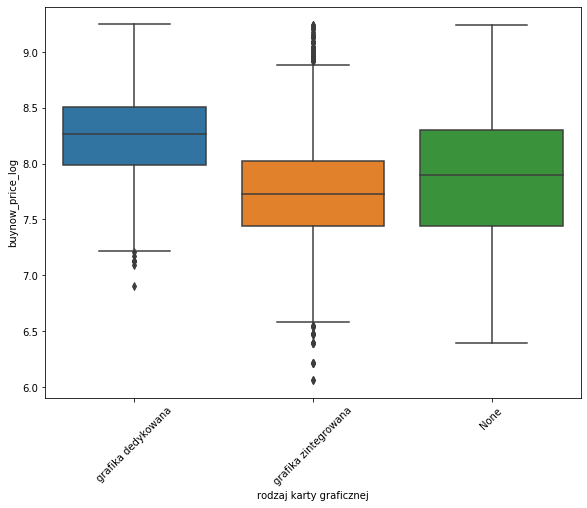

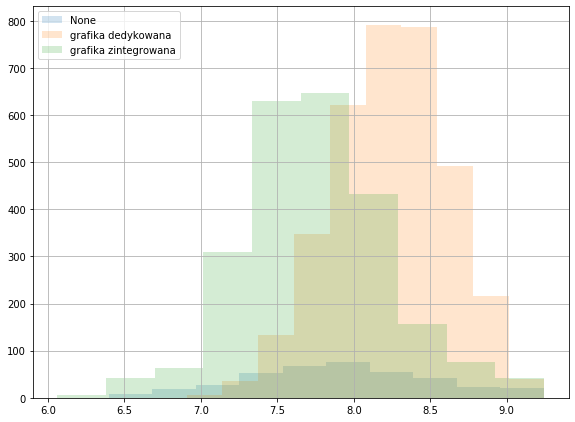

,min,mean,p01,p25,median,p75,p99,max,count
rodzaj karty graficznej,,,,,,,,,
grafika dedykowana,999.0,4068.956052,1546.37,2946.5,3879.0,4939.000,8292.300,10369.27,3468.0
grafika zintegrowana,429.0,2598.653318,689.40,1699.0,2277.0,3049.000,8293.748,10350.00,2405.0
None,600.0,3231.191224,726.30,1700.0,2701.5,4025.475,9925.200,10330.00,392.0


In [16]:
mpl.rcParams["figure.figsize"] = [1.5*6.4, 1.5*4.8]
insepctVariable(dataset_train,'rodzaj karty graficznej')
# TODO: dodać flagę gdy null + zamiana None ekspercko na zintegrowana

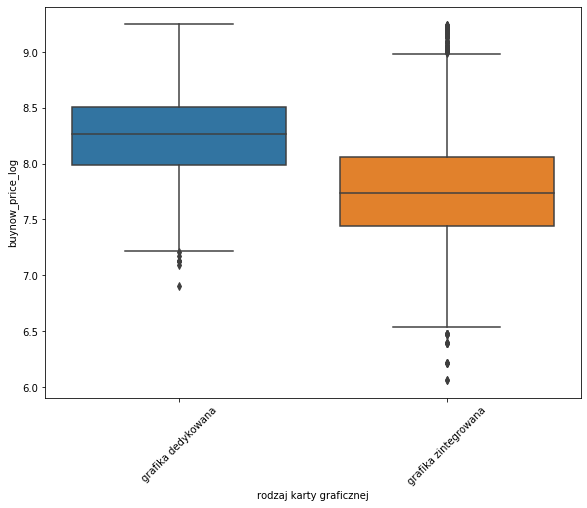

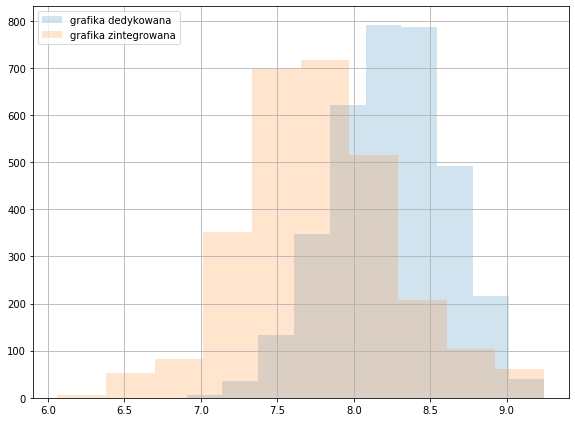

,min,mean,p01,p25,median,p75,p99,max,count
rodzaj karty graficznej,,,,,,,,,
grafika dedykowana,999.0,4068.956052,1546.37,2946.5,3879.0,4939.0,8292.3000,10369.27,3468.0
grafika zintegrowana,429.0,2687.303607,699.00,1699.0,2299.0,3149.0,8886.5584,10350.00,2797.0


In [17]:
insepctVariable(dataset_train.replace({'rodzaj karty graficznej': {None: 'grafika zintegrowana'}}),'rodzaj karty graficznej')
# średnia i mediana na podobnych poziomach

### komunikacja

['gps', 'intel wireless display (widi)', 'wi-fi 802.11 a/b/g/n', 'wi-fi 802.11 b/g/n', 'lan 10/100/1000 mbps', 'bluetooth', 'wi-fi 802.11 b/g/n/ac', 'modem 4g (lte)', 'lan 10/100 mbps', 'modem 3g (wwan)', 'nfc (near field communication)', 'wi-fi', 'wi-fi 802.11 a/b/g/n/ac'] 

size: 13


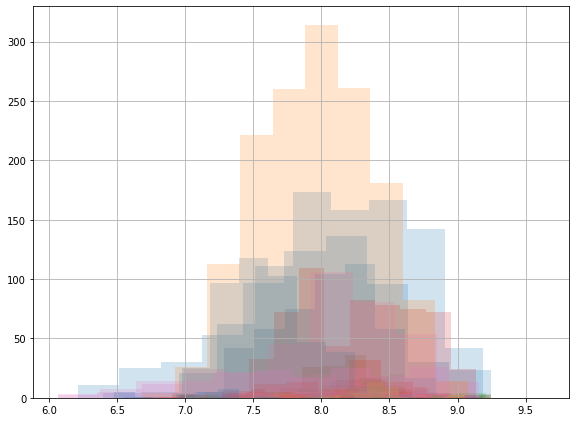

,min,mean,p01,p25,median,p75,p99,max,count
komunikacja,,,,,,,,,
"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",799.0,3130.702595,1179.0000,2096.5,2899.0,3929.345,6806.50,8750.0,1476.0
"['bluetooth', 'lan 10/100 mbps']",599.0,3952.861763,1075.8728,2459.0,3669.0,5251.000,8450.92,9749.0,885.0
None,499.0,3205.453264,649.0000,1899.0,2899.0,4053.900,9748.40,10330.0,625.0
"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'intel wireless display (widi)', 'nfc (near field communication)', 'modem 3g (wwan)']",1449.0,4276.215784,1749.0000,2649.0,4009.0,5799.000,8161.00,9299.0,593.0
"['bluetooth', 'lan 10/100/1000 mbps']",749.0,3264.738228,1359.9109,2349.0,3193.0,3999.000,6053.00,6899.0,474.0
...,...,...,...,...,...,...,...,...,...
"['wi-fi 802.11 b/g/n/ac', 'wi-fi 802.11 a/b/g/n/ac', 'wi-fi 802.11 b/g/n', 'wi-fi 802.11 a/b/g/n', 'bluetooth', 'lan 10/100 mbps']",2849.0,2849.000000,2849.0000,2849.0,2849.0,2849.000,2849.00,2849.0,1.0
"['wi-fi 802.11 b/g/n/ac', 'wi-fi 802.11 b/g/n', 'bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'modem 3g (wwan)', 'modem 4g (lte)']",4290.0,4290.000000,4290.0000,4290.0,4290.0,4290.000,4290.00,4290.0,1.0
"['wi-fi 802.11 b/g/n/ac', 'wi-fi 802.11 b/g/n', 'bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps']",3990.0,3990.000000,3990.0000,3990.0,3990.0,3990.000,3990.00,3990.0,1.0


In [18]:
insepctVariable(dataset_train,'komunikacja', 0)

# TODO: dodać flagę null + flagi dla poszczególnych wartości z list - interpretacja - laptop posiada dany standard komunikacji

In [19]:
def fill_komunikacja(x):
    if x[0] is None: return [['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']]
    else: return x

dataset_train[['komunikacja filled']] = dataset_train[['komunikacja']].apply(lambda x: fill_komunikacja(x), axis = 1)

['gps', 'intel wireless display (widi)', 'wi-fi 802.11 a/b/g/n', 'wi-fi 802.11 b/g/n', 'lan 10/100/1000 mbps', 'bluetooth', 'wi-fi 802.11 b/g/n/ac', 'modem 4g (lte)', 'lan 10/100 mbps', 'modem 3g (wwan)', 'nfc (near field communication)', 'wi-fi', 'wi-fi 802.11 a/b/g/n/ac'] 

size: 13


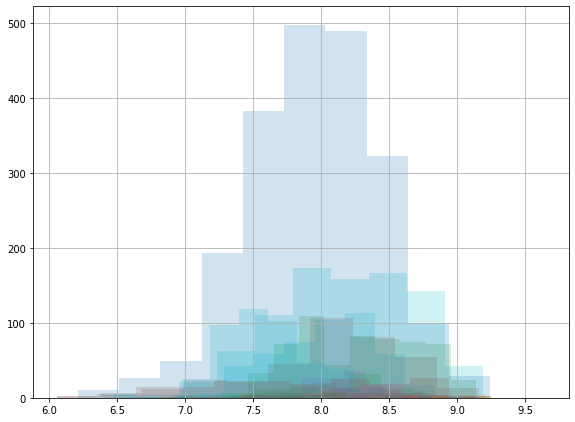

,min,mean,p01,p25,median,p75,p99,max,count
komunikacja filled,,,,,,,,,
"['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']",499.0,3152.939229,799.0000,2049.00,2899.0,3950.0,8289.0000,10330.00,2101.0
"['bluetooth', 'lan 10/100 mbps']",599.0,3952.861763,1075.8728,2459.00,3669.0,5251.0,8450.9200,9749.00,885.0
"['bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'intel wireless display (widi)', 'nfc (near field communication)', 'modem 3g (wwan)']",1449.0,4276.215784,1749.0000,2649.00,4009.0,5799.0,8161.0000,9299.00,593.0
"['bluetooth', 'lan 10/100/1000 mbps']",749.0,3264.738228,1359.9109,2349.00,3193.0,3999.0,6053.0000,6899.00,474.0
"['wi-fi', 'bluetooth', 'lan 10/100 mbps']",699.0,2106.481787,1192.5100,1595.75,1949.0,2400.0,4001.6627,5810.56,442.0
...,...,...,...,...,...,...,...,...,...
"['wi-fi 802.11 b/g/n/ac', 'bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'intel wireless display (widi)']",2199.0,2199.000000,2199.0000,2199.00,2199.0,2199.0,2199.0000,2199.00,1.0
"['wi-fi 802.11 b/g/n/ac', 'wi-fi 802.11 a/b/g/n/ac', 'wi-fi 802.11 b/g/n', 'wi-fi 802.11 a/b/g/n', 'bluetooth', 'lan 10/100 mbps']",2849.0,2849.000000,2849.0000,2849.00,2849.0,2849.0,2849.0000,2849.00,1.0
"['wi-fi 802.11 b/g/n/ac', 'wi-fi 802.11 b/g/n', 'bluetooth', 'lan 10/100/1000 mbps', 'lan 10/100 mbps', 'modem 3g (wwan)', 'modem 4g (lte)']",4290.0,4290.000000,4290.0000,4290.00,4290.0,4290.0,4290.0000,4290.00,1.0


In [20]:
insepctVariable(dataset_train,'komunikacja filled', 0)

### rozdzielczość (piksele)

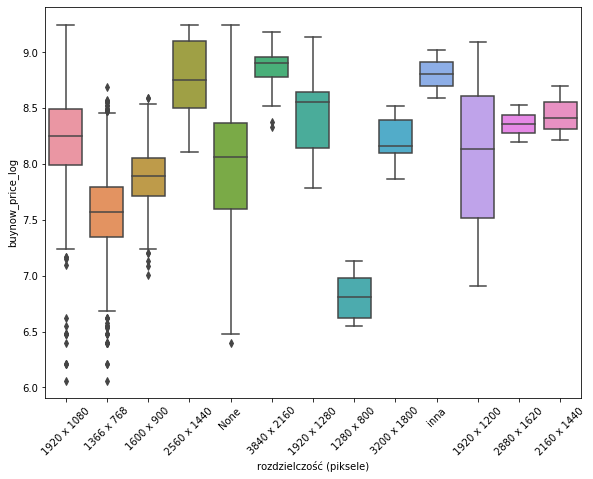

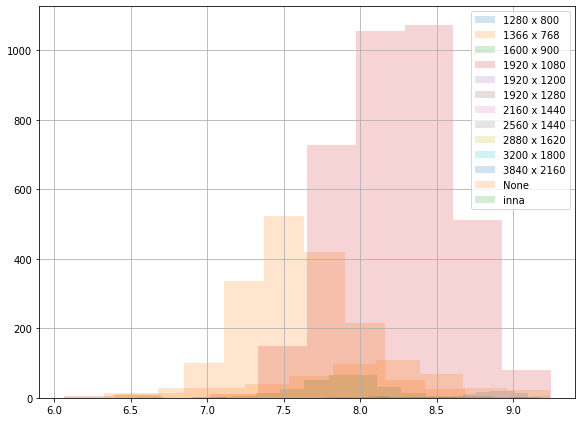

,min,mean,p01,p25,median,p75,p99,max,count
rozdzielczość (piksele),,,,,,,,,
1920 x 1080,429.00,4038.367310,1653.6000,2949.0000,3818.995,4889.0000,8181.7910,10369.27,3624.0
1366 x 768,429.00,2066.810223,719.0000,1549.0000,1935.000,2429.0000,4644.8700,5919.00,1701.0
None,600.00,3437.649393,729.0000,1999.9925,3183.500,4322.2500,9919.6000,10330.00,494.0
1600 x 900,1099.00,2746.990036,1328.0000,2241.5000,2685.000,3133.9925,5108.0000,5368.00,280.0
3840 x 2160,4149.00,7224.853933,4325.8800,6519.0000,7336.000,7799.0000,9353.0000,9749.00,89.0
2560 x 1440,3326.43,6706.451250,3372.8118,4923.5475,6320.000,8999.0000,10269.2700,10350.00,24.0
1920 x 1280,2399.00,4874.999524,2458.2000,3449.0000,5190.000,5690.0000,8810.0000,9315.00,21.0
3200 x 1800,2599.00,3674.073333,2599.0000,3299.0000,3499.000,4401.4725,4946.1000,4989.00,12.0
1280 x 800,699.00,924.990000,699.0000,751.5000,908.500,1074.0000,1242.7810,1249.00,10.0


In [21]:
# {'2160 x 1440', '2560 x 1600', '1920 x 1200'} excluded

insepctVariable(dataset_train,'rozdzielczość (piksele)')

#  TODO: dodać flagę null + przypisać None dominante

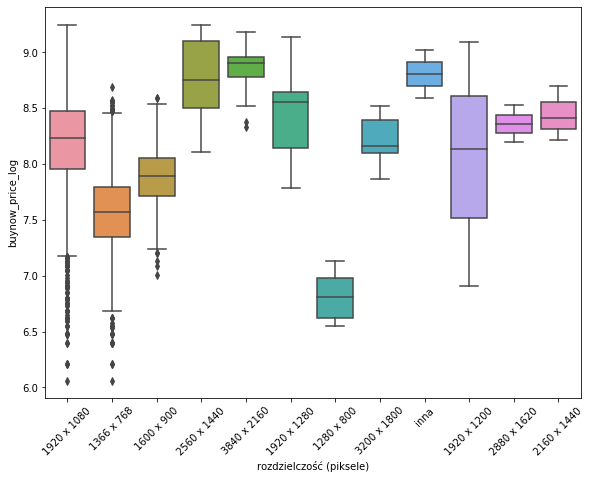

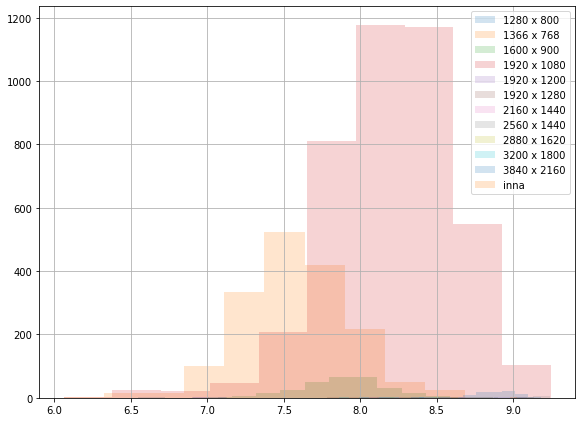

,min,mean,p01,p25,median,p75,p99,max,count
rozdzielczość (piksele),,,,,,,,,
1920 x 1080,429.00,3966.304500,979.0000,2849.0000,3777.95,4799.0000,8458.9600,10369.27,4118.0
1366 x 768,429.00,2066.810223,719.0000,1549.0000,1935.00,2429.0000,4644.8700,5919.00,1701.0
1600 x 900,1099.00,2746.990036,1328.0000,2241.5000,2685.00,3133.9925,5108.0000,5368.00,280.0
3840 x 2160,4149.00,7224.853933,4325.8800,6519.0000,7336.00,7799.0000,9353.0000,9749.00,89.0
2560 x 1440,3326.43,6706.451250,3372.8118,4923.5475,6320.00,8999.0000,10269.2700,10350.00,24.0
1920 x 1280,2399.00,4874.999524,2458.2000,3449.0000,5190.00,5690.0000,8810.0000,9315.00,21.0
3200 x 1800,2599.00,3674.073333,2599.0000,3299.0000,3499.00,4401.4725,4946.1000,4989.00,12.0
1280 x 800,699.00,924.990000,699.0000,751.5000,908.50,1074.0000,1242.7810,1249.00,10.0
1920 x 1200,999.00,4430.090000,1047.1246,2202.1150,3405.23,6145.6350,8776.4238,8886.04,3.0


In [22]:
insepctVariable(dataset_train.replace({'rozdzielczość (piksele)': {None: '1920 x 1080'}}),'rozdzielczość (piksele)')

# średnia i mediana na podobnych poziomach

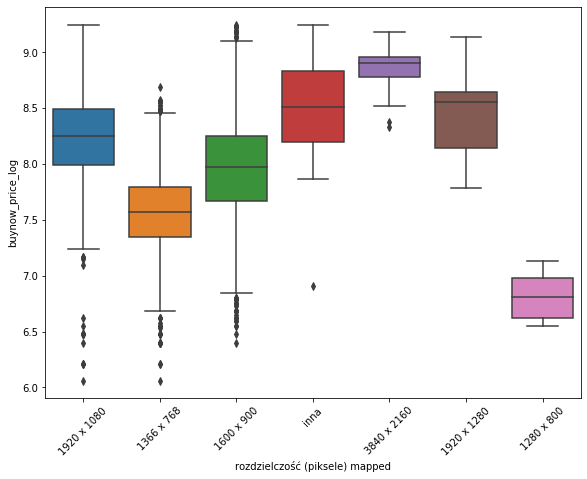

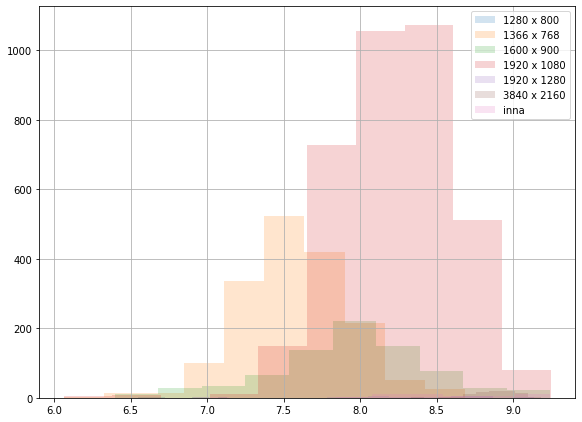

,min,mean,p01,p25,median,p75,p99,max,count
rozdzielczość (piksele) mapped,,,,,,,,,
1920 x 1080,429.0,4038.367310,1653.60,2949.0000,3818.995,4889.0000,8181.791,10369.27,3624.0
1366 x 768,429.0,2066.810223,719.00,1549.0000,1935.000,2429.0000,4644.870,5919.00,1701.0
1600 x 900,600.0,3187.798463,750.00,2149.0000,2899.000,3833.0000,9621.600,10330.00,774.0
3840 x 2160,4149.0,7224.853933,4325.88,6519.0000,7336.000,7799.0000,9353.000,9749.00,89.0
inna,999.0,5540.164348,1719.00,3636.7575,4964.365,6830.9775,10192.050,10350.00,46.0
1920 x 1280,2399.0,4874.999524,2458.20,3449.0000,5190.000,5690.0000,8810.000,9315.00,21.0
1280 x 800,699.0,924.990000,699.00,751.5000,908.500,1074.0000,1242.781,1249.00,10.0


In [23]:
def map_resolution(x):
    # print(x[0])
    if x[0] is None: 
        return '1600 x 900'
    elif x[0] in ['1920 x 1080','1366 x 768', '1600 x 900','3840 x 2160','1920 x 1280', '1280 x 800']:
        return x
    else: 
        return 'inna'

#     if x is None: 
#         return '1920 x 1080'
#     elif x == '1920 x 1080': # in ['1920 x 1080','1366 x 768', '1600 x 900','3840 x 2160']:
#         return x
#     else: 
#         return 'inna'
    
dataset_train['rozdzielczość (piksele) mapped'] = dataset_train[['rozdzielczość (piksele)']].apply(lambda x: map_resolution(x), axis = 1)
insepctVariable(dataset_train,'rozdzielczość (piksele) mapped')

### liczba rdzeni procesora

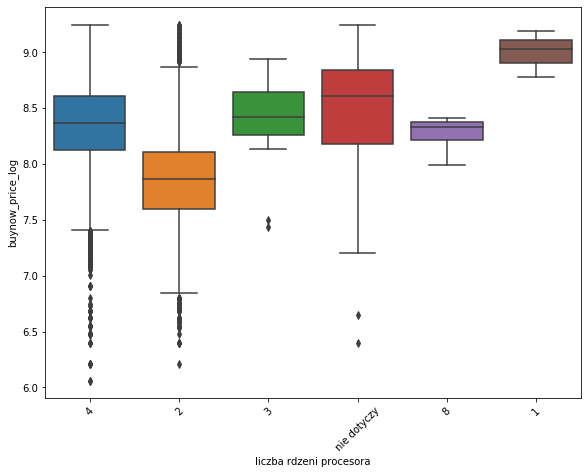

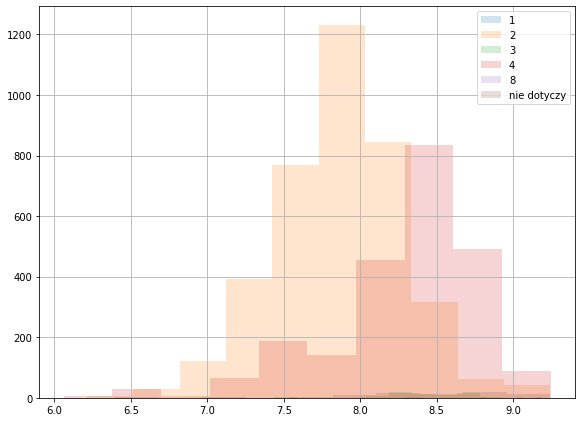

,min,mean,p01,p25,median,p75,p99,max,count
liczba rdzeni procesora,,,,,,,,,
2,499.0,2813.198856,949.0,1999.00,2599.0,3329.00,7789.01,10350.00,3810.0
4,429.0,4395.258333,699.0,3392.25,4320.5,5498.75,8449.00,10369.27,2310.0
nie dotyczy,600.0,5586.594366,718.3,3579.45,5458.9,6900.00,10239.00,10330.00,71.0
3,1699.0,4763.420746,1765.0,3849.00,4549.0,5699.00,7599.00,7599.00,67.0
8,2949.0,3936.500000,2980.5,3736.50,4149.0,4349.00,4493.00,4499.00,4.0
1,6510.0,8216.666667,6547.2,7440.00,8370.0,9070.00,9742.00,9770.00,3.0


In [24]:
# print(dataset_train[dataset_train['liczba rdzeni procesora'] == '3'])
# większośc nulle
insepctVariable(dataset_train,'liczba rdzeni procesora')

# nie dotyczy wypełnić medianą


In [25]:
dataset_train[dataset_train['liczba rdzeni procesora'] == '3'].groupby('seria procesora').buynow_price.agg([np.mean,np.size] )

# dataset_train[dataset_train['seria procesora'] == 'intel core i5'].groupby('liczba rdzeni procesora').buynow_price.agg([np.mean,np.size] )

dataset_train[dataset_train['seria procesora'] == 'intel core i7'].groupby('liczba rdzeni procesora').buynow_price.agg([np.mean,np.size] )
dataset_train[dataset_train['liczba rdzeni procesora'] == '3']

pd.set_option('display.max_rows', 165)
dataset_train.groupby(['seria procesora', 'liczba rdzeni procesora', 'taktowanie bazowe procesora (ghz)']).buynow_price.agg([np.mean,np.size, np.median])
# hiddem.groupby(['seria procesora', 'liczba rdzeni procesora', 'taktowanie bazowe procesora (ghz)']).agg([np.mean,np.size] )
dataset.groupby(['seria procesora', 'liczba rdzeni procesora', 'taktowanie bazowe procesora (ghz)']).agg([np.mean,np.size] )

# Mozna wpr poprawe jesli 'quad' to liczba rdzeni = 4, jeli dual to liczba rdzeni = 2

buynow_price  \
                                                                                            mean   
seria procesora          liczba rdzeni procesora taktowanie bazowe procesora (ghz)                 
amd a10                  2                       2.40                                1899.000000   
                                                 2.90                                2199.000000   
                         4                       1.90                                1746.535000   
                                                 2.40                                1885.571429   
                                                 2.70                                2499.000000   
amd a12                  4                       2.50                                2400.000000   
                                                 2.70                                2663.501000   
amd a4                   2                       1.00                                 599.000000   
                         4                       1.00                                 599.000000   
                                                 1.50                                1499.000000   
                                                 1.80                                1207.000000   
amd a6                   2                       2.50                                1856.545455   
                                                 2.90                                1499.000000   
                         4                       1.80                                2069.694227   
                                                 2.00                                1698.357143   
                                                 2.40                                1319.000000   
amd a8                   2                       1.60                                1799.000000   
                         4                       1.60                                2059.500000   
                                                 1.80                                1743.842500   
                                                 1.90                                1469.000000   
                                                 2.00                                1907.750000   
                                                 2.10                                1699.000000   
                                                 2.20                                2031.923077   
amd e1                   2                       1.35                                1205.842105   
                                                 1.50                                1377.000000   
inny procesor            2                       0.80                                1799.000000   
                                                 1.10                                2999.000000   
                                                 1.20                                3951.298333   
                                                 1.33                                 749.000000   
                                                 3.00                                1933.500000   
                         4                       1.20                                4499.000000   
                                                 1.30                                 639.909091   
                                                 1.33                                 615.363636   
                                                 1.40                                2299.000000   
                                                 1.44                                1145.250000   
                                                 2.10                                1980.638571   
                                                 2.24                                1049.000000   
                                                 3.00                               

In [26]:
dataset_train[dataset_train['liczba rdzeni procesora'] == 'nie dotyczy'].shape

(71, 20)

###  wielkość pamięci ram

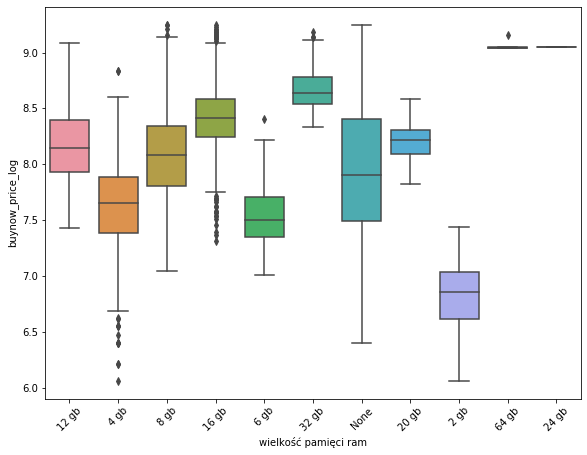

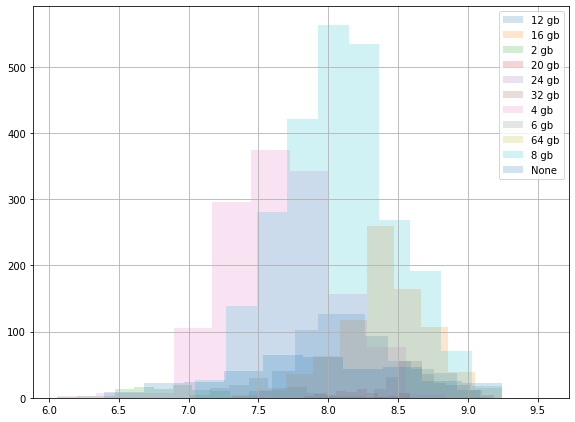

,min,mean,p01,p25,median,p75,p99,max,count
wielkość pamięci ram,,,,,,,,,
8 gb,1149.0,3506.414166,1429.0000,2452.000,3239.00,4199.00,7823.1184,10369.27,2513.0
4 gb,429.0,2250.740850,813.4400,1609.000,2099.00,2649.00,4883.8000,6861.00,1377.0
16 gb,1499.0,4683.286467,1941.6100,3799.000,4497.00,5358.00,9471.3000,10350.00,818.0
12 gb,1690.0,3806.717862,1949.0000,2789.000,3449.00,4429.00,7799.0000,8857.99,650.0
None,600.0,3362.560780,710.6000,1799.000,2699.00,4488.95,10180.0000,10330.00,359.0
32 gb,4149.0,5943.329630,4252.5000,5109.000,5664.00,6486.00,9109.2500,9749.00,270.0
6 gb,1109.0,1940.041696,1168.4897,1556.500,1806.44,2231.50,3699.0000,4486.36,112.0
2 gb,429.0,960.421443,496.2000,749.000,949.00,1139.99,1699.0000,1699.00,97.0
20 gb,2499.0,3765.016190,2561.0000,3264.005,3699.00,4049.00,5355.0000,5355.00,63.0


In [27]:
insepctVariable(dataset_train,'wielkość pamięci ram')
# dataset_train.columns
# flaga None + wypełnic None moda konwersja na numeryczną - jeśli jeśli gb przeskalować na mb, 
# dataset_train.dropna().apply(lambda x:  str.split(x['wielkość pamięci ram'][2] , " " ), axis = 1)

In [28]:
def ram_convert_mb(x):
    if x is None: return None
    if str.lower(str.split(x," ")[1]) == 'gb' : 
        return np.int(str.split(x," ")[0])*1024
    else:
        return np.int(str.split(x," ")[0])

dataset_train['wielkość pamięci ram (mb)'] = dataset_train.apply(lambda x: ram_convert_mb(x['wielkość pamięci ram']), axis = 1)

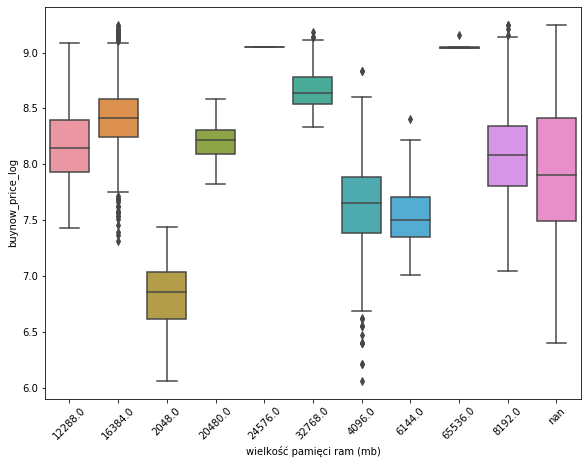

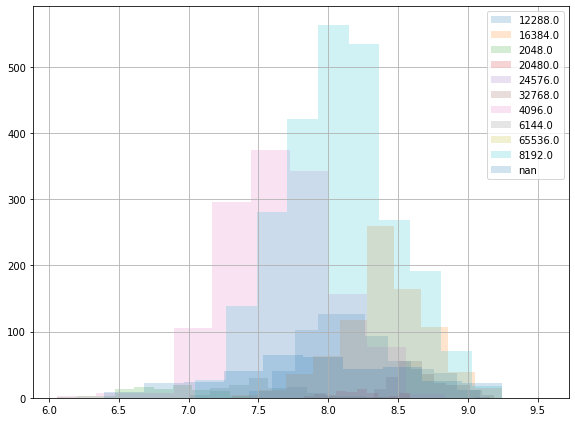

,min,mean,p01,p25,median,p75,p99,max,count
wielkość pamięci ram (mb),,,,,,,,,
8192.0,1149.0,3506.414166,1429.0000,2452.000,3239.00,4199.00,7823.1184,10369.27,2513.0
4096.0,429.0,2250.740850,813.4400,1609.000,2099.00,2649.00,4883.8000,6861.00,1377.0
16384.0,1499.0,4683.286467,1941.6100,3799.000,4497.00,5358.00,9471.3000,10350.00,818.0
12288.0,1690.0,3806.717862,1949.0000,2789.000,3449.00,4429.00,7799.0000,8857.99,650.0
nan,600.0,3362.560780,710.6000,1799.000,2699.00,4488.95,10180.0000,10330.00,359.0
32768.0,4149.0,5943.329630,4252.5000,5109.000,5664.00,6486.00,9109.2500,9749.00,270.0
6144.0,1109.0,1940.041696,1168.4897,1556.500,1806.44,2231.50,3699.0000,4486.36,112.0
2048.0,429.0,960.421443,496.2000,749.000,949.00,1139.99,1699.0000,1699.00,97.0
20480.0,2499.0,3765.016190,2561.0000,3264.005,3699.00,4049.00,5355.0000,5355.00,63.0


In [29]:

#hidden['wielkość pamięci ram'].unique()
insepctVariable(dataset_train,'wielkość pamięci ram (mb)')


In [30]:
median_ram = dataset_train['wielkość pamięci ram (mb)'].median(); median_ram
# 8192.0

8192.0

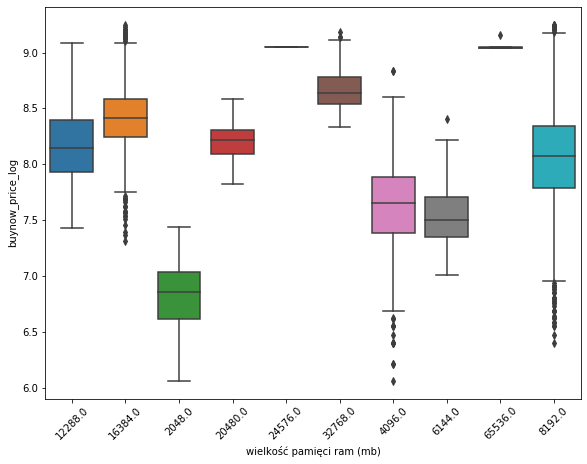

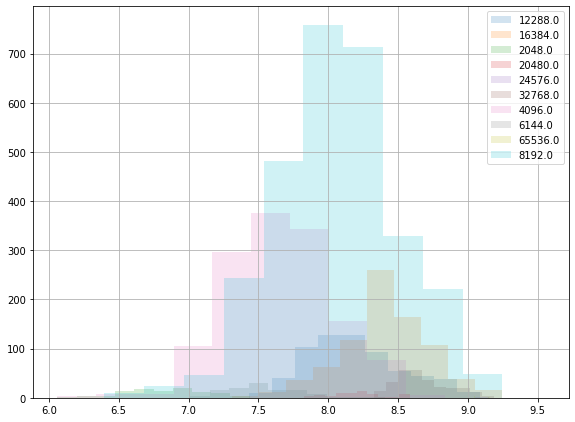

,min,mean,p01,p25,median,p75,p99,max,count
wielkość pamięci ram (mb),,,,,,,,,
8192.0,600.0,3488.432493,1017.7471,2399.000,3199.00,4199.00,8425.50,10369.27,2872.0
4096.0,429.0,2250.740850,813.4400,1609.000,2099.00,2649.00,4883.80,6861.00,1377.0
16384.0,1499.0,4683.286467,1941.6100,3799.000,4497.00,5358.00,9471.30,10350.00,818.0
12288.0,1690.0,3806.717862,1949.0000,2789.000,3449.00,4429.00,7799.00,8857.99,650.0
32768.0,4149.0,5943.329630,4252.5000,5109.000,5664.00,6486.00,9109.25,9749.00,270.0
6144.0,1109.0,1940.041696,1168.4897,1556.500,1806.44,2231.50,3699.00,4486.36,112.0
2048.0,429.0,960.421443,496.2000,749.000,949.00,1139.99,1699.00,1699.00,97.0
20480.0,2499.0,3765.016190,2561.0000,3264.005,3699.00,4049.00,5355.00,5355.00,63.0
65536.0,8449.0,8669.000000,8449.0000,8449.000,8449.00,8499.00,9459.00,9499.00,5.0


In [31]:
insepctVariable(dataset_train.replace({'wielkość pamięci ram (mb)': {np.nan: median_ram}}), 'wielkość pamięci ram (mb)')

### system operacyjny

['windows 10 professional', 'windows 8.1 professional 64-bit', 'windows 7 home 64-bit', 'windows 8.1 home 64-bit', 'windows 7 professional 64-bit', 'windows 7 professional 32-bit', 'windows 8.1 home 32-bit', 'brak systemu', 'windows 10 home', 'windows 8.1 professional 32-bit', 'inny', 'linux'] 

size: 12


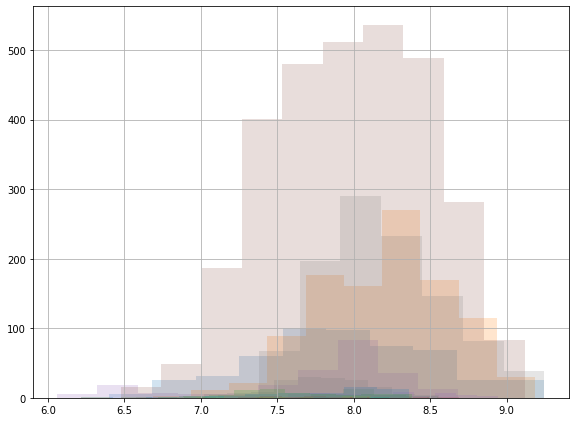

,min,mean,p01,p25,median,p75,p99,max,count
system operacyjny,,,,,,,,,
['windows 10 home'],649.0,3293.187227,949.000,1985.0000,2982.000,4289.00,7749.0000,9113.00,3033.0
['windows 10 professional'],719.0,3913.789839,1698.160,2724.5000,3449.000,4683.17,9512.4532,10369.27,1059.0
['brak systemu'],800.0,3965.843620,1249.000,2625.0000,3799.000,4975.00,8382.4800,9749.00,1047.0
None,600.0,3280.370953,772.900,1899.0000,2769.000,4269.50,9883.1000,10330.00,514.0
"['windows 10 home', 'inny']",429.0,2697.043290,499.000,1999.0000,2899.000,3399.00,5869.0000,5899.00,231.0
['windows 7 professional 64-bit'],1119.0,2521.323462,1119.000,1994.0000,2419.000,2999.00,4844.0000,5199.00,156.0
['windows 8.1 home 64-bit'],829.0,2197.503103,1011.400,1596.4125,1844.985,2749.00,4149.9300,4350.00,58.0
"['windows 8.1 home 64-bit', 'inny']",499.0,2697.113208,733.000,1929.0000,2879.000,3335.00,4138.7200,4289.00,53.0
"['windows 7 professional 64-bit', 'windows 10 professional']",1939.0,3820.117647,1949.000,2574.0000,3490.000,4895.00,7320.0000,7650.00,51.0


In [32]:
insepctVariable(dataset_train,'system operacyjny', 0)


In [33]:
def map_system(x):
    if x[0] is None: 
        return 'windows 10 home'
    else: 
        if 'windows 10 home' in x[0]:
            return 'windows 10 home'
        elif 'windows 10 professional' in x[0]:
            return 'windows 10 professional'
        elif 'windows 7 professional 64-bit' in x[0]:
            return 'windows 7 professional 64-bit'
        elif 'windows 8.1 home 64-bit' in x[0]:
            return 'windows 8.1 home 64-bit'
        elif 'brak systemu' in x[0]:
            return 'brak systemu'
        else: return 'inny'

dataset_train['system operacyjny map'] = dataset_train[['system operacyjny']].apply(lambda x: map_system(x), axis = 1 )

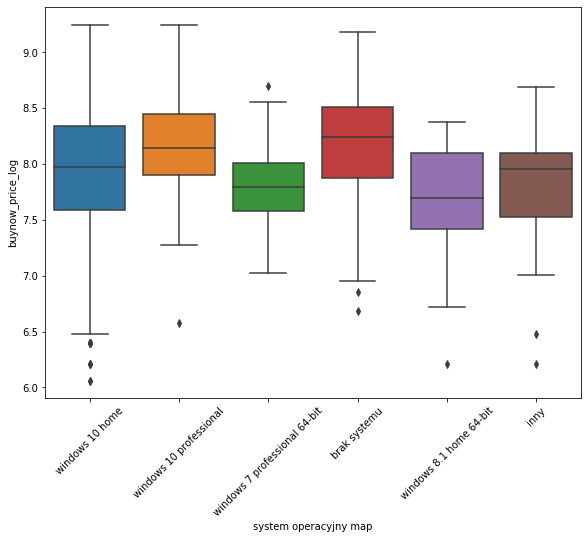

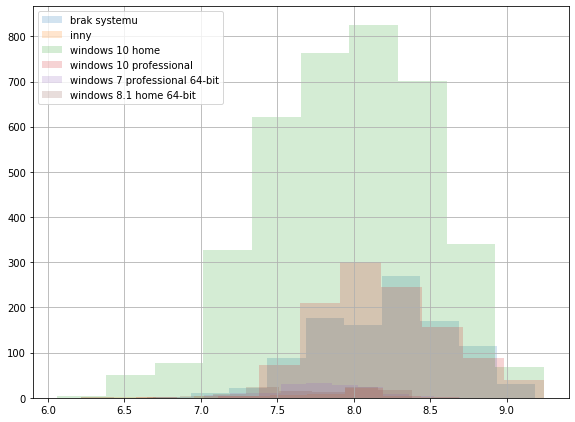

,min,mean,p01,p25,median,p75,p99,max,count
system operacyjny map,,,,,,,,,
windows 10 home,429.0,3254.555049,749.0,1969.000,2911.0,4199.5,8149.0000,10330.00,3779.0
windows 10 professional,719.0,3907.152587,1699.0,2709.000,3449.0,4669.0,9485.3504,10369.27,1117.0
brak systemu,800.0,3965.843620,1249.0,2625.000,3799.0,4975.0,8382.4800,9749.00,1047.0
windows 7 professional 64-bit,1119.0,2538.870000,1119.0,1964.000,2419.0,2999.0,5028.0000,5970.00,158.0
windows 8.1 home 64-bit,499.0,2436.055676,841.0,1660.335,2199.0,3299.0,4260.1000,4350.00,111.0
inny,499.0,2650.809434,577.0,1849.000,2849.0,3299.0,5524.3200,5919.00,53.0


In [34]:
insepctVariable(dataset_train,'system operacyjny map')

In [35]:
# można dodać liczbę systemów
dataset_train[['system operacyjny']].apply(lambda x: len(x[0])  if x[0] is not None else 0, axis = 1 ).value_counts()



for value in ['professional', 'home', '10', '8', '7']: 
    dataset_train['system operacyjny ' + str(value)] = dataset_train[['system operacyjny']].\
        apply(lambda x:  1*any([value in item for item in x[0]]) if x[0] is not None else 0, axis = 1 )

    
dataset_train.loc[:,
                  ['system operacyjny', 
                   'system operacyjny professional',
                   'system operacyjny home',
                   'system operacyjny 10', 
                   'system operacyjny 8',
                   'system operacyjny 7']]

,system operacyjny,system operacyjny professional,system operacyjny home,system operacyjny 10,system operacyjny 8,system operacyjny 7
0,[windows 10 home],0,1,1,0,0
4,[windows 10 professional],1,0,1,0,0
5,[windows 10 home],0,1,1,0,0
7,[windows 7 professional 64-bit],1,0,0,0,1
10,[windows 10 home],0,1,1,0,0
...,...,...,...,...,...,...
11713,[windows 10 home],0,1,1,0,0
11714,[windows 10 professional],1,0,1,0,0
11715,[windows 10 professional],1,0,1,0,0
11717,[windows 10 home],0,1,1,0,0


### typ dysku twardego

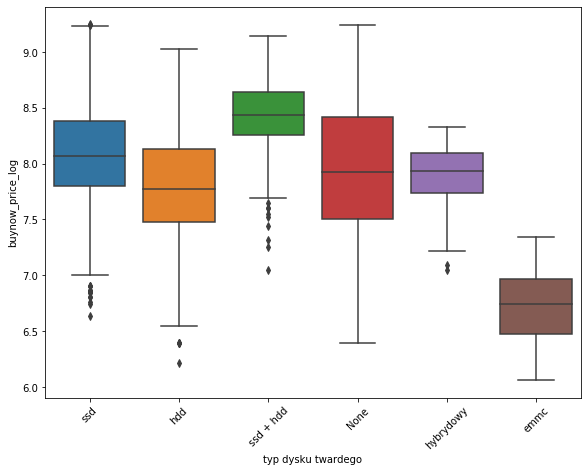

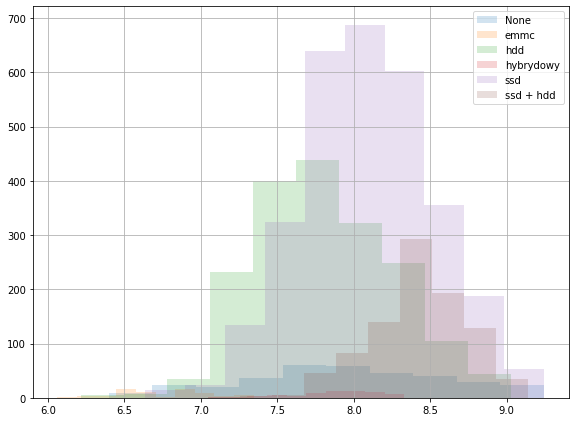

,min,mean,p01,p25,median,p75,p99,max,count
typ dysku twardego,,,,,,,,,
ssd,759.0,3572.663692,1246.0906,2449.00,3199.0,4349.00,8616.00,10369.27,3023.0
hdd,499.0,2719.322005,1027.8968,1759.50,2379.0,3389.50,6882.34,8349.00,1835.0
ssd + hdd,1149.0,4762.753974,2199.0000,3846.00,4599.0,5640.07,8424.00,9299.00,926.0
None,600.0,3448.522820,711.9000,1821.75,2759.5,4514.00,10180.00,10330.00,344.0
emmc,429.0,895.693056,429.0000,649.00,849.0,1061.25,1489.36,1549.00,72.0
hybrydowy,1149.0,2712.578923,1184.2064,2287.00,2799.0,3279.00,4047.24,4149.00,65.0


In [36]:
insepctVariable(dataset_train,'typ dysku twardego')

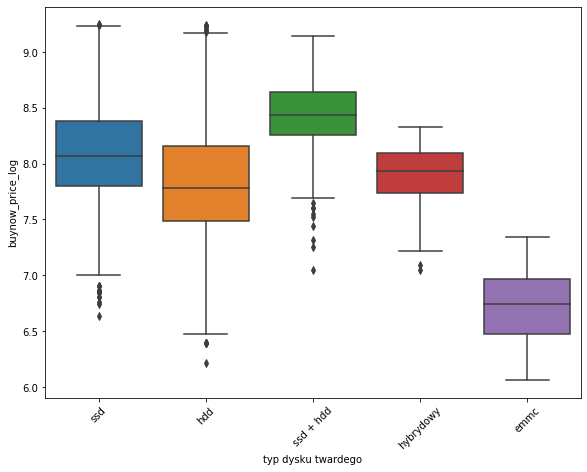

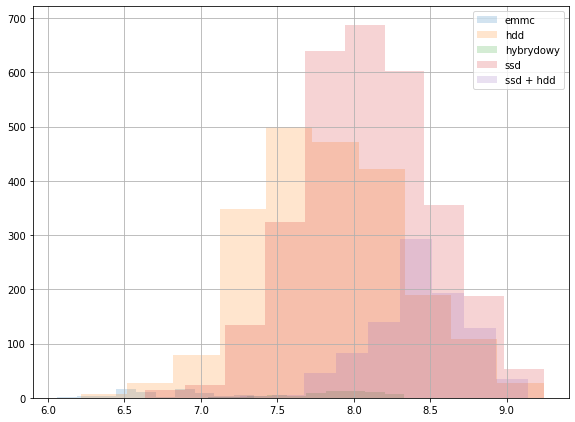

,min,mean,p01,p25,median,p75,p99,max,count
typ dysku twardego,,,,,,,,,
ssd,759.0,3572.663692,1246.0906,2449.0,3199.0,4349.00,8616.000,10369.27,3023.0
hdd,499.0,2834.441363,799.7800,1779.0,2399.0,3499.00,8264.862,10330.00,2179.0
ssd + hdd,1149.0,4762.753974,2199.0000,3846.0,4599.0,5640.07,8424.000,9299.00,926.0
emmc,429.0,895.693056,429.0000,649.0,849.0,1061.25,1489.360,1549.00,72.0
hybrydowy,1149.0,2712.578923,1184.2064,2287.0,2799.0,3279.00,4047.240,4149.00,65.0


In [37]:
insepctVariable(dataset_train.replace({'typ dysku twardego': {None: 'hdd'}}),'typ dysku twardego')

### sterowanie

['klawiatura numeryczna', 'klawiatura podświetlana', 'touchpad', 'klawiatura'] 

size: 4


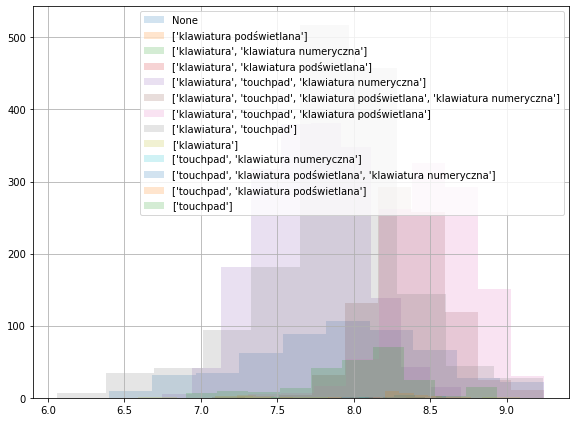

,min,mean,p01,p25,median,p75,p99,max,count
sterowanie,,,,,,,,,
"['klawiatura', 'touchpad', 'klawiatura numeryczna']",848.00,2379.406459,1169.0000,1791.7500,2253.500,2868.7975,4849.5100,5999.00,1850.0
"['klawiatura', 'touchpad']",429.00,2903.692153,649.0000,2149.0000,2699.000,3449.0000,8148.0000,10245.49,1547.0
"['klawiatura', 'touchpad', 'klawiatura podświetlana']",1200.00,5278.144476,1971.5000,4225.2500,5039.000,6319.0000,9212.8020,10350.00,1146.0
"['klawiatura', 'touchpad', 'klawiatura podświetlana', 'klawiatura numeryczna']",1179.90,4461.702993,2530.9500,3649.0000,4249.000,5099.0000,8452.3342,10369.27,872.0
None,600.00,3221.221584,737.8200,1829.0000,2868.900,4113.9500,9732.2000,10330.00,543.0
['touchpad'],997.00,3342.449342,999.0000,2549.0000,3199.000,3993.5000,7431.0000,7599.00,243.0
"['touchpad', 'klawiatura podświetlana']",2520.00,4240.592593,2826.5400,3699.0000,4199.000,4749.0000,6139.0000,6399.00,27.0
"['touchpad', 'klawiatura podświetlana', 'klawiatura numeryczna']",2749.00,4176.500000,2801.5000,3874.0000,4149.000,4484.0000,5446.0000,5449.00,16.0
['klawiatura podświetlana'],1387.00,2242.200000,1398.7000,1542.0000,1647.000,2739.2500,4636.4500,4744.00,10.0


In [38]:
insepctVariable(dataset_train,'sterowanie', 0)

# flaga null + rozdzielenie list

In [39]:
dataset_train[['sterowanie']].apply(lambda x:  ('klawiatura podświetlana' in x[0])*1 if x[0] is not None else 0, axis = 1) 
dataset_train[['sterowanie']].apply(lambda x:  ('klawiatura numeryczna' in x[0])*1 if x[0] is not None else 0, axis = 1) 

0        0
4        0
5        1
7        1
10       1
        ..
11713    1
11714    0
11715    0
11717    0
11719    0
Length: 6265, dtype: int64

### multimedia

['mikrofon', 'głośniki', 'czytnik kart pamięci', 'kamera'] 

size: 4


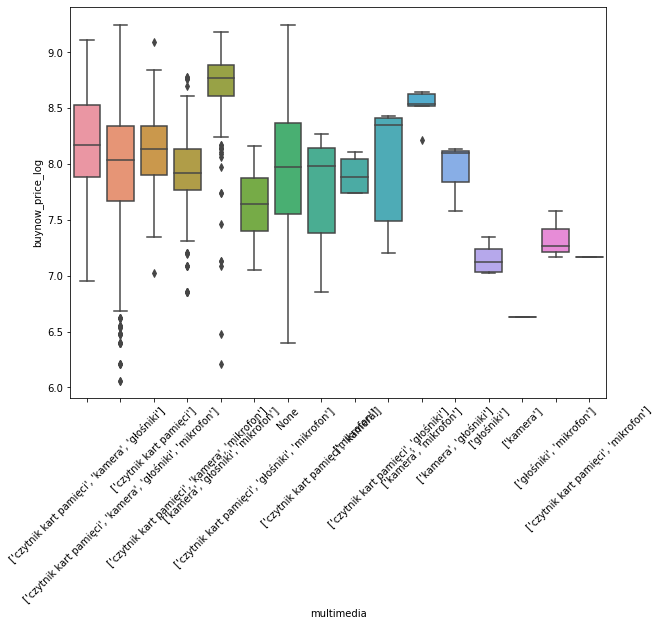

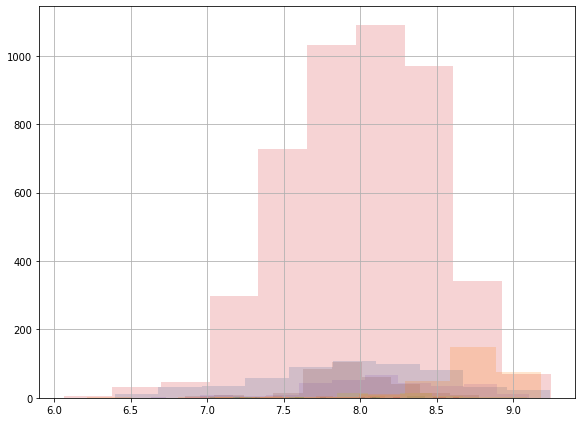

,min,mean,p01,p25,median,p75,p99,max,count
multimedia,,,,,,,,,
"['czytnik kart pamięci', 'kamera', 'głośniki', 'mikrofon']",429.00,3315.257346,906.50,2149.00,3079.655,4199.000,8028.8000,10369.27,4616.0
None,600.00,3329.534859,729.00,1899.75,2910.500,4301.250,9812.9000,10330.00,568.0
"['czytnik kart pamięci', 'kamera', 'mikrofon']",949.00,2929.181527,949.00,2369.00,2739.000,3399.000,6212.3000,6499.00,347.0
"['czytnik kart pamięci', 'kamera', 'głośniki']",1049.00,3893.343633,1098.00,2662.50,3522.000,5051.000,7759.8000,9024.00,311.0
"['kamera', 'głośniki', 'mikrofon']",499.00,6237.828596,1244.50,5493.50,6407.000,7252.000,8941.0100,9749.00,292.0
['czytnik kart pamięci'],1119.00,3500.401569,1334.00,2699.00,3399.000,4199.000,7878.4950,8857.99,51.0
"['czytnik kart pamięci', 'kamera']",949.00,2560.177857,962.50,1611.50,2924.000,3449.000,3880.1000,3899.00,28.0
"['czytnik kart pamięci', 'głośniki', 'mikrofon']",1149.00,2173.166667,1183.50,1636.50,2099.000,2636.500,3496.7000,3499.00,24.0
"['czytnik kart pamięci', 'głośniki']",1349.00,3380.666667,1349.00,2061.50,4224.000,4489.000,4569.0000,4569.00,6.0


In [40]:
insepctVariable(dataset_train,'multimedia')

['mikrofon', 'głośniki', 'czytnik kart pamięci', 'kamera'] 

size: 4


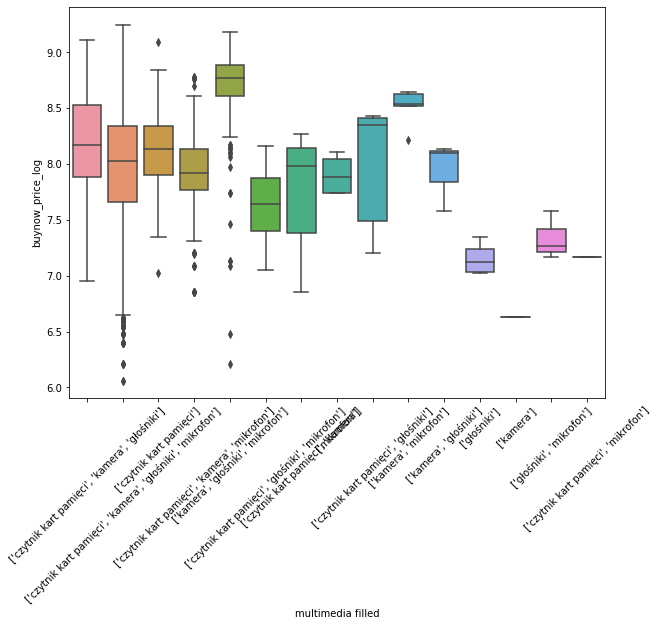

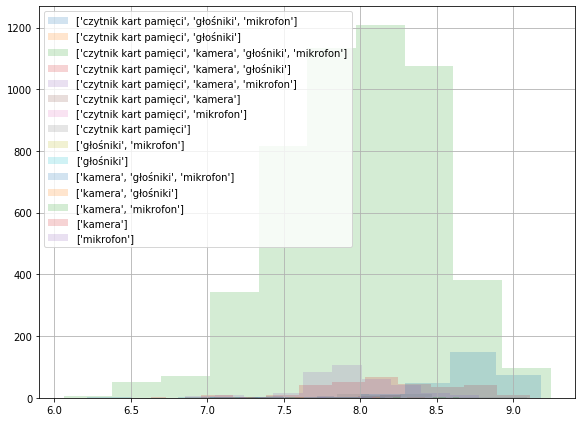

,min,mean,p01,p25,median,p75,p99,max,count
multimedia filled,,,,,,,,,
"['czytnik kart pamięci', 'kamera', 'głośniki', 'mikrofon']",429.00,3316.821703,799.00,2119.00,3050.000,4199.000,8393.2066,10369.27,5184.0
"['czytnik kart pamięci', 'kamera', 'mikrofon']",949.00,2929.181527,949.00,2369.00,2739.000,3399.000,6212.3000,6499.00,347.0
"['czytnik kart pamięci', 'kamera', 'głośniki']",1049.00,3893.343633,1098.00,2662.50,3522.000,5051.000,7759.8000,9024.00,311.0
"['kamera', 'głośniki', 'mikrofon']",499.00,6237.828596,1244.50,5493.50,6407.000,7252.000,8941.0100,9749.00,292.0
['czytnik kart pamięci'],1119.00,3500.401569,1334.00,2699.00,3399.000,4199.000,7878.4950,8857.99,51.0
"['czytnik kart pamięci', 'kamera']",949.00,2560.177857,962.50,1611.50,2924.000,3449.000,3880.1000,3899.00,28.0
"['czytnik kart pamięci', 'głośniki', 'mikrofon']",1149.00,2173.166667,1183.50,1636.50,2099.000,2636.500,3496.7000,3499.00,24.0
"['czytnik kart pamięci', 'głośniki']",1349.00,3380.666667,1349.00,2061.50,4224.000,4489.000,4569.0000,4569.00,6.0
"['kamera', 'mikrofon']",3704.00,5049.833333,3768.75,4999.00,5099.000,5574.000,5699.0000,5699.00,6.0


In [41]:
def fill_multimedia(x):
    if x[0] is None: return [['czytnik kart pamięci', 'kamera', 'głośniki', 'mikrofon']]
    else: return x

dataset_train[['multimedia filled']] = dataset_train[['multimedia']].apply(lambda x: fill_multimedia(x), axis = 1)
insepctVariable(dataset_train,'multimedia filled')

### typ pamici ram

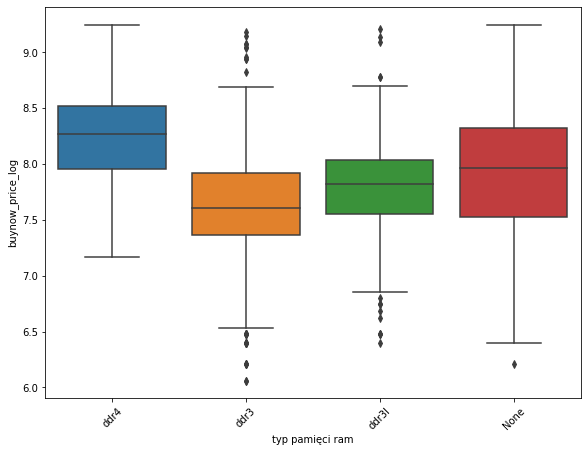

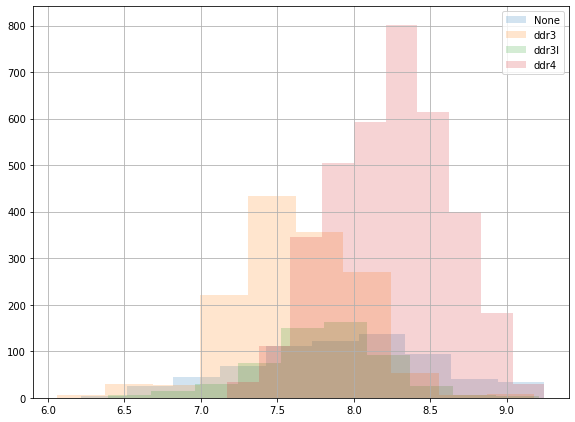

,min,mean,p01,p25,median,p75,p99,max,count
typ pamięci ram,,,,,,,,,
ddr4,1299.0,4089.509203,1620.1,2859.0,3899.0,4999.000,8312.8484,10369.27,3612.0
ddr3,429.0,2241.449717,649.0,1575.0,2019.0,2749.000,5197.2565,9699.00,1412.0
None,499.0,3270.490662,729.0,1849.0,2868.9,4106.475,10022.0000,10350.00,680.0
ddr3l,599.0,2615.614777,829.0,1899.0,2499.0,3099.000,5999.0000,9999.00,561.0


In [42]:
insepctVariable(dataset_train,'typ pamięci ram')

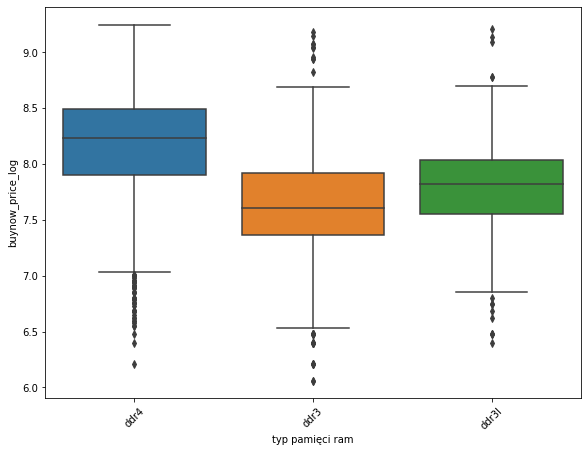

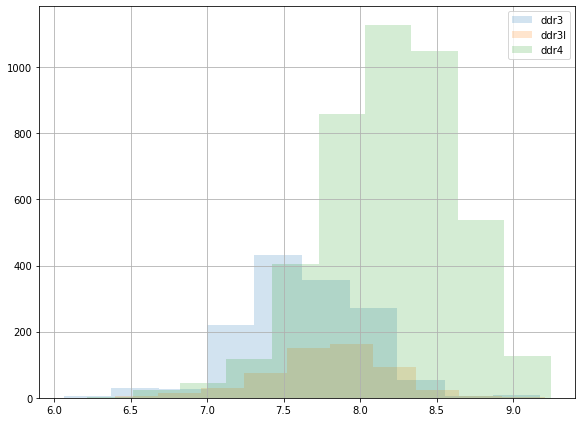

,min,mean,p01,p25,median,p75,p99,max,count
typ pamięci ram,,,,,,,,,
ddr4,499.0,3959.748576,1049.0,2699.0,3749.0,4899.0,8649.0000,10369.27,4292.0
ddr3,429.0,2241.449717,649.0,1575.0,2019.0,2749.0,5197.2565,9699.00,1412.0
ddr3l,599.0,2615.614777,829.0,1899.0,2499.0,3099.0,5999.0000,9999.00,561.0


In [43]:
insepctVariable(dataset_train.replace({'typ pamięci ram': {None: 'ddr4'}}),'typ pamięci ram')

### taktowanie bazowe procesora (ghz)

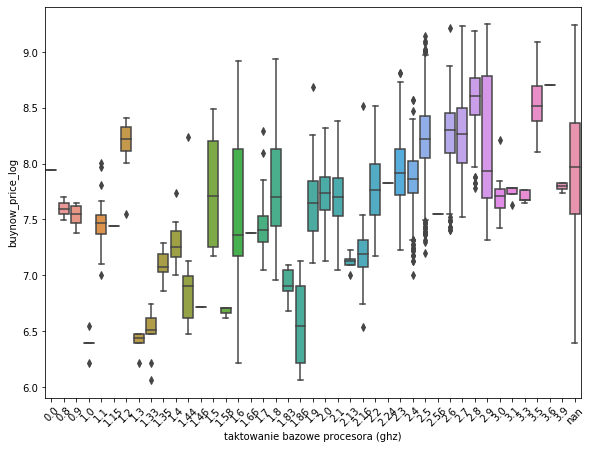

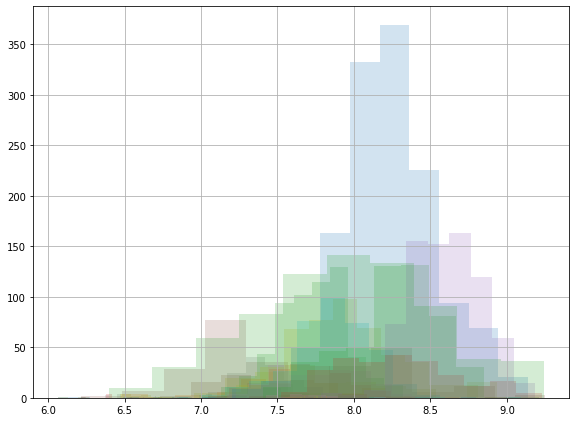

,min,mean,p01,p25,median,p75,p99,max,count
taktowanie bazowe procesora (ghz),,,,,,,,,
2.5,1339.00,3955.588080,1723.0000,3129.0000,3699.000,4559.0000,7874.0000,9299.00,1349.0
2.8,2399.00,5612.999044,3158.2800,4599.0000,5479.000,6419.0000,8848.0000,9749.00,753.0
nan,600.00,3318.054597,750.0000,1899.0000,2899.000,4277.7500,9967.1000,10350.00,744.0
2.0,1249.00,2344.315501,1343.0000,1959.0000,2300.000,2649.0000,3849.0000,4099.01,589.0
2.6,1649.00,4017.308430,1787.1000,3267.2500,4019.000,4701.5000,6421.0000,9999.00,516.0
2.3,1380.00,2971.014170,1499.0000,2249.2500,2749.000,3396.7500,6083.0000,6699.00,458.0
2.4,1099.00,2667.664313,1313.0000,2299.0000,2599.000,3047.0550,4382.6740,5251.00,371.0
1.6,499.00,2322.595906,726.0300,1299.0000,1573.000,3399.0000,6299.0000,7499.00,254.0
2.7,1849.00,4260.515432,2058.4000,2998.0000,3899.000,4918.0000,9631.3532,10212.38,243.0


In [44]:
insepctVariable(dataset_train,'taktowanie bazowe procesora (ghz)')

2.5


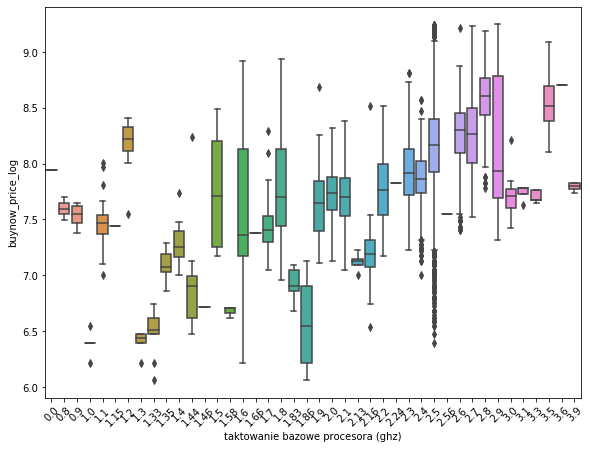

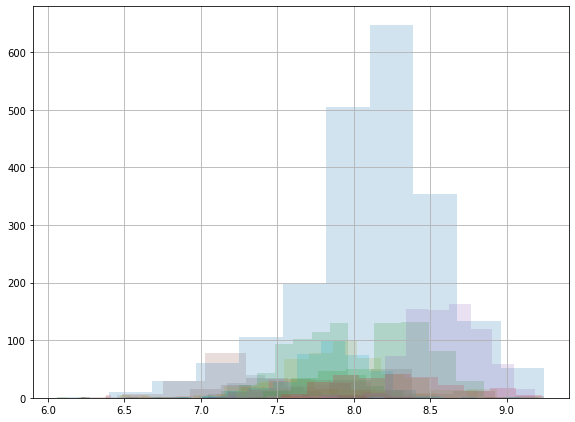

,min,mean,p01,p25,median,p75,p99,max,count
taktowanie bazowe procesora (ghz),,,,,,,,,
2.5,600.00,3728.963660,889.1200,2769.0000,3527.000,4455.1400,9300.2800,10350.00,2093.0
2.8,2399.00,5612.999044,3158.2800,4599.0000,5479.000,6419.0000,8848.0000,9749.00,753.0
2.0,1249.00,2344.315501,1343.0000,1959.0000,2300.000,2649.0000,3849.0000,4099.01,589.0
2.6,1649.00,4017.308430,1787.1000,3267.2500,4019.000,4701.5000,6421.0000,9999.00,516.0
2.3,1380.00,2971.014170,1499.0000,2249.2500,2749.000,3396.7500,6083.0000,6699.00,458.0
2.4,1099.00,2667.664313,1313.0000,2299.0000,2599.000,3047.0550,4382.6740,5251.00,371.0
1.6,499.00,2322.595906,726.0300,1299.0000,1573.000,3399.0000,6299.0000,7499.00,254.0
2.7,1849.00,4260.515432,2058.4000,2998.0000,3899.000,4918.0000,9631.3532,10212.38,243.0
2.2,1299.99,2473.658363,1369.2970,1874.0000,2361.000,2959.5000,4329.0070,4989.00,171.0


In [45]:
processor_median = dataset_train['taktowanie bazowe procesora (ghz)'].median(); print(processor_median)
# processor_median = 2.5

insepctVariable(dataset_train.replace({'taktowanie bazowe procesora (ghz)': {np.nan: processor_median}}),'taktowanie bazowe procesora (ghz)')

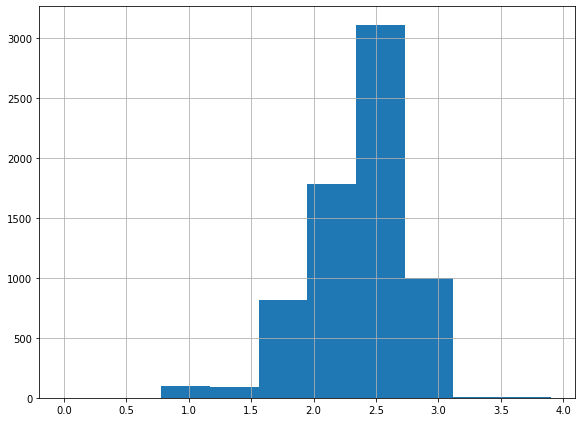

In [46]:
dataset['taktowanie bazowe procesora (ghz)'].hist()
plt.show()

### seria procesora

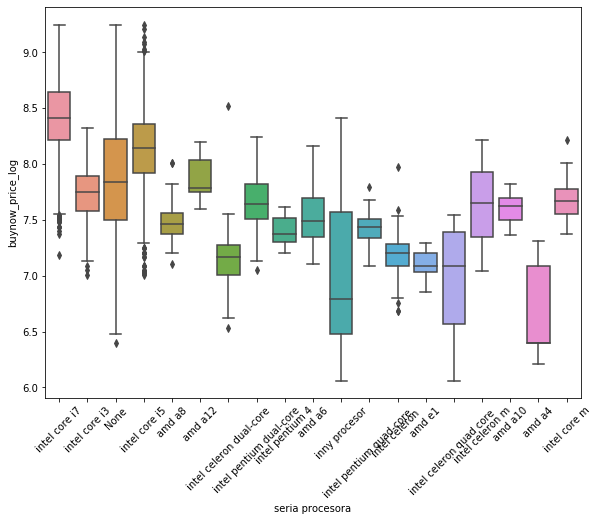

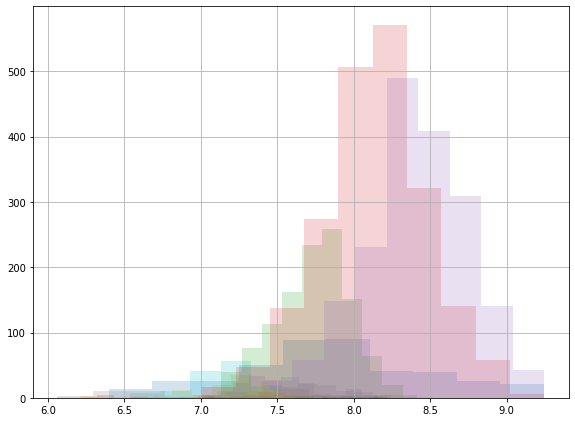

,min,mean,p01,p25,median,p75,p99,max,count
seria procesora,,,,,,,,,
intel core i5,1099.00,3626.274207,1482.4300,2749.000,3449.0,4249.0000,7686.0000,10350.00,2080.0
intel core i7,1319.00,4745.852425,1909.0000,3679.500,4499.0,5699.0000,9204.7580,10369.27,1856.0
intel core i3,1099.00,2340.016679,1299.9900,1949.000,2319.0,2678.9900,3781.4000,4099.01,1123.0
None,600.00,3110.976396,699.0000,1799.000,2530.0,3738.9500,10129.6000,10330.00,419.0
amd a6,1219.00,1925.783313,1249.0000,1549.000,1783.0,2199.0025,3499.0041,3499.01,160.0
intel celeron dual-core,689.00,1302.643750,766.5000,1099.000,1299.0,1449.0000,1853.5000,5000.00,136.0
intel pentium dual-core,1149.00,2174.397704,1266.0000,1829.000,2079.0,2484.0050,3531.0000,3799.01,135.0
intel celeron,799.00,1337.066556,799.8900,1199.000,1349.0,1453.5000,2069.5200,2899.00,90.0
intel pentium quad-core,1199.00,1695.473485,1199.0000,1541.500,1689.0,1828.9350,2256.7500,2429.00,66.0


In [47]:
insepctVariable(dataset_train,'seria procesora')

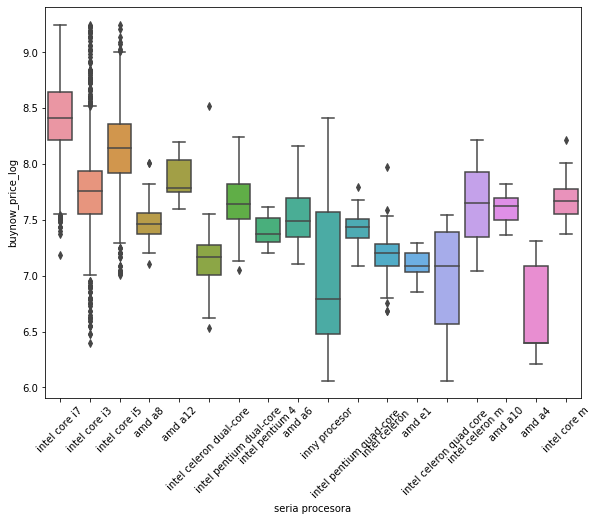

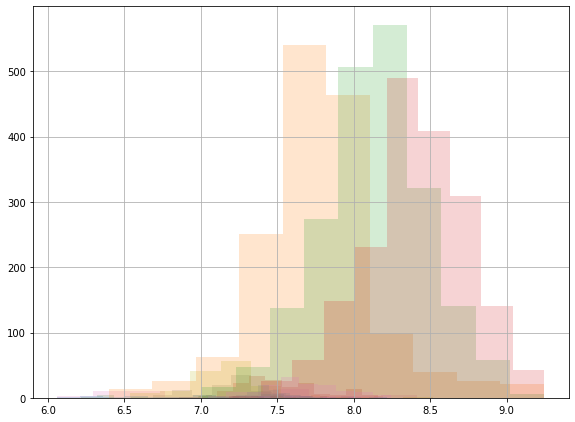

,min,mean,p01,p25,median,p75,p99,max,count
seria procesora,,,,,,,,,
intel core i5,1099.00,3626.274207,1482.4300,2749.000,3449.000,4249.0000,7686.0000,10350.00,2080.0
intel core i7,1319.00,4745.852425,1909.0000,3679.500,4499.000,5699.0000,9204.7580,10369.27,1856.0
intel core i3,600.00,2549.505733,814.3500,1899.000,2349.005,2799.0000,8476.2000,10330.00,1542.0
amd a6,1219.00,1925.783313,1249.0000,1549.000,1783.000,2199.0025,3499.0041,3499.01,160.0
intel celeron dual-core,689.00,1302.643750,766.5000,1099.000,1299.000,1449.0000,1853.5000,5000.00,136.0
intel pentium dual-core,1149.00,2174.397704,1266.0000,1829.000,2079.000,2484.0050,3531.0000,3799.01,135.0
intel celeron,799.00,1337.066556,799.8900,1199.000,1349.000,1453.5000,2069.5200,2899.00,90.0
intel pentium quad-core,1199.00,1695.473485,1199.0000,1541.500,1689.000,1828.9350,2256.7500,2429.00,66.0
inny procesor,429.00,1482.745200,463.3000,649.000,899.000,1936.5000,4450.0000,4499.00,50.0


In [48]:
dataset[dataset['seria procesora'] == 'intel core i5'].groupby('liczba rdzeni procesora').buynow_price.mean()
dataset[dataset['seria procesora'] == 'intel core i7'].groupby('liczba rdzeni procesora').buynow_price.mean()




insepctVariable(dataset_train.replace({'seria procesora': {None: 'intel core i3'}}),'seria procesora')

In [49]:
dataset_train[['seria procesora']].apply(lambda x: ('amd' in x[0]) if x[0] is not None else 0, axis = 1 )



for value in ['amd', 'celeron', 'pentium']: 
    dataset_train['seria procesora ' + str(value)] = dataset_train[['seria procesora']].\
        apply(lambda x: 1*(value in x[0]) if x[0] is not None else 0, axis = 1 )

dataset_train.loc[:,
                  ['seria procesora amd',
                  'seria procesora celeron',
                  'seria procesora pentium']].sum()


seria procesora amd        260
seria procesora celeron    252
seria procesora pentium    215
dtype: int64

### stan

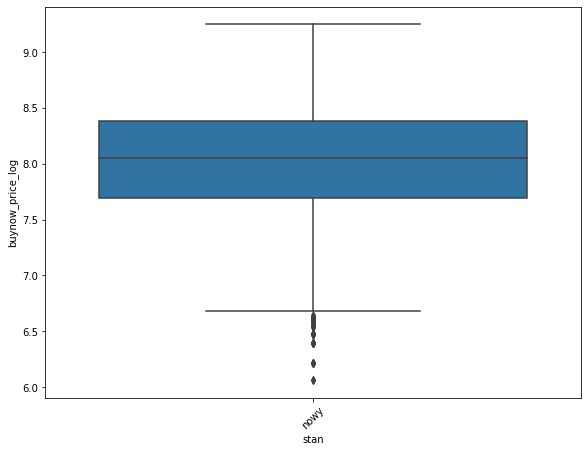

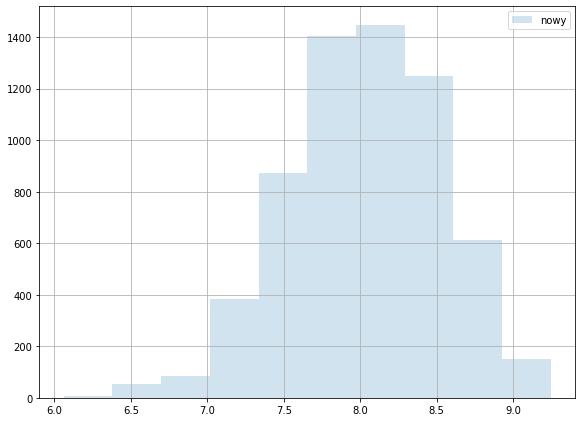

,min,mean,p01,p25,median,p75,p99,max,count
stan,,,,,,,,,
nowy,429.0,3452.119358,832.84,2200.0,3129.0,4369.0,8449.0,10369.27,6265.0


In [50]:
insepctVariable(dataset_train,'stan')

In [51]:
dataset_train.drop(columns = 'stan', inplace = True)

### pojemność dysku (gb)

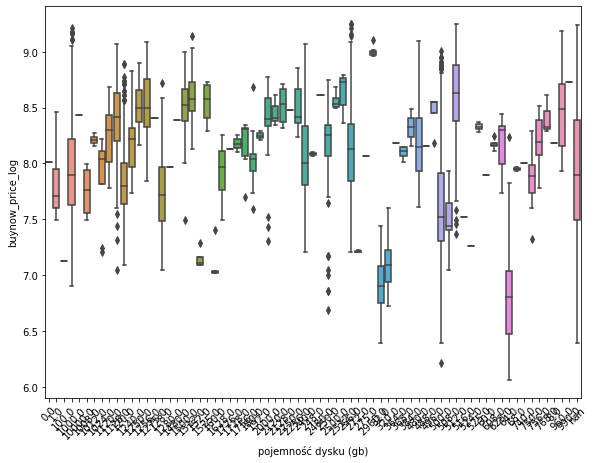

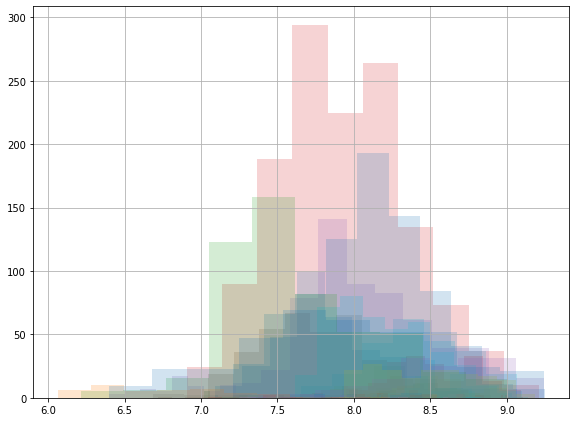

,min,mean,p01,p25,median,p75,p99,max,count
pojemność dysku (gb),,,,,,,,,
1000.0,999.0,3049.263731,1210.4234,2049.0000,2699.00,3699.000,7557.1000,9999.00,1340.0
256.0,1349.0,3565.035289,1498.9754,2549.0000,3399.00,4236.825,8393.5556,10369.27,779.0
240.0,1349.0,3452.441099,1549.0000,2456.0000,2999.00,4178.990,7224.0000,8678.00,573.0
500.0,499.0,2344.515625,712.5000,1486.5000,1847.00,2729.000,7199.0000,8186.00,528.0
480.0,2023.0,3815.859529,2183.8000,2799.0000,3449.00,4499.000,7733.0000,8924.00,425.0
nan,600.0,3308.714199,723.0000,1799.0000,2699.00,4399.000,9956.0000,10330.00,381.0
128.0,1149.0,2442.111521,1199.0000,1781.2550,2249.00,2880.000,5307.7478,6122.45,355.0
120.0,1199.0,2657.371148,1349.0000,2068.9950,2428.99,2999.000,6252.0000,7261.00,331.0
1128.0,1149.0,4669.340667,1777.0000,3646.0000,4529.00,5594.250,8479.5000,8649.00,240.0


In [52]:
insepctVariable(dataset_train,'pojemność dysku (gb)')

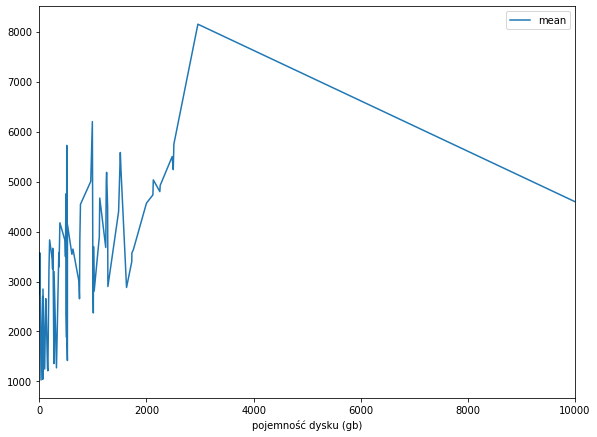

In [53]:
dataset_train.groupby(['pojemność dysku (gb)']).buynow_price.agg(mean = np.mean).plot.line()
plt.show()

In [54]:
dataset_train[dataset_train['pojemność dysku (gb)'] > 3000]

,buynow_price,taktowanie bazowe procesora (ghz),wielkość pamięci ram,rodzaj karty graficznej,typ dysku twardego,gwarancja,liczba rdzeni procesora,system operacyjny,sterowanie,seria procesora,...,system operacyjny map,system operacyjny professional,system operacyjny home,system operacyjny 10,system operacyjny 8,system operacyjny 7,multimedia filled,seria procesora amd,seria procesora celeron,seria procesora pentium
9717,4597.0,2.6,16 gb,grafika dedykowana,hdd,producenta,4,[windows 10 home],"[klawiatura, touchpad, klawiatura podświetlana...",intel core i7,...,windows 10 home,0,1,1,0,0,"[czytnik kart pamięci, kamera, głośniki, mikro...",0,0,0


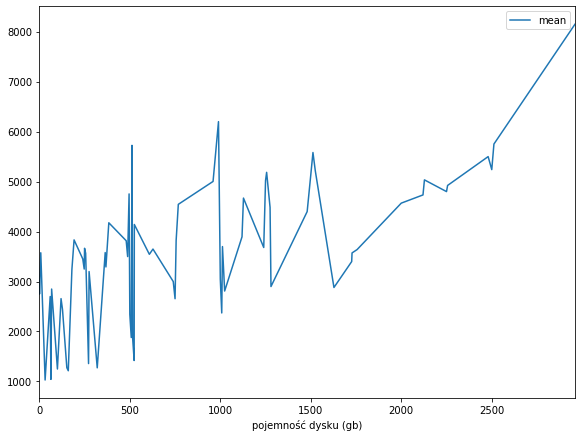

In [55]:
dataset_train.replace({'pojemność dysku (gb)': {10000: 1000} }).groupby(['pojemność dysku (gb)']).buynow_price.agg(mean = np.mean).plot.line()
plt.show()

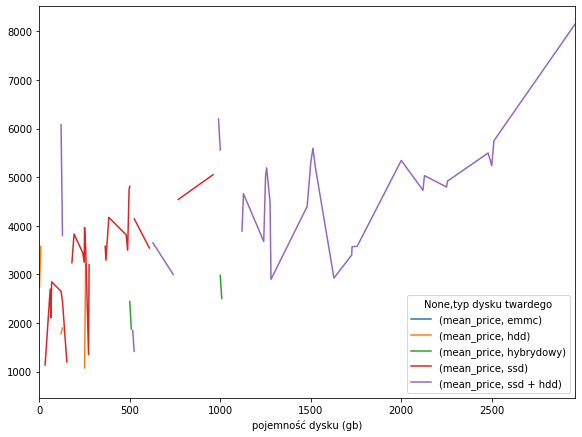

In [56]:
dataset_train.replace({'pojemność dysku (gb)': {10000: 1000} }).\
   groupby(['pojemność dysku (gb)', 'typ dysku twardego']).buynow_price.\
   agg(mean_price = np.mean).unstack().plot.line()
plt.show()

500.0


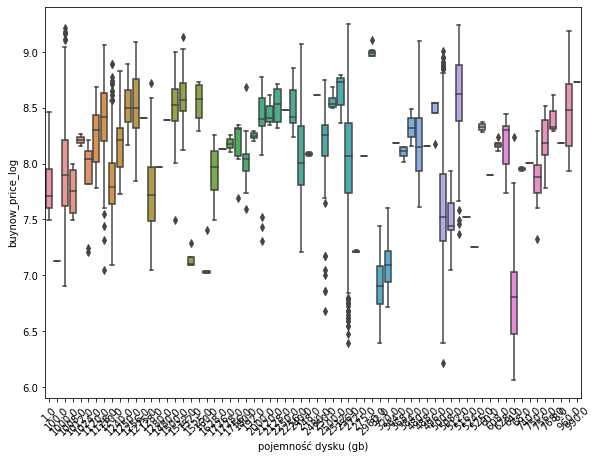

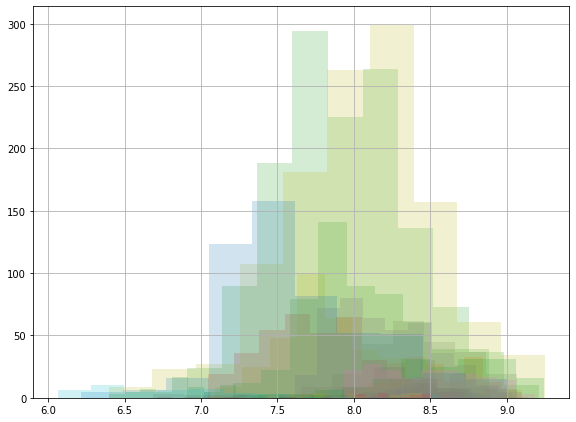

,min,mean,p01,p25,median,p75,p99,max,count
pojemność dysku (gb),,,,,,,,,
1000.0,999.0,3050.417897,1210.564,2049.0000,2699.00,3699.000,7557.0000,9999.00,1341.0
256.0,600.0,3480.440655,799.000,2299.0000,3200.00,4283.000,9516.5640,10369.27,1161.0
240.0,1349.0,3452.441099,1549.000,2456.0000,2999.00,4178.990,7224.0000,8678.00,573.0
500.0,499.0,2344.515625,712.500,1486.5000,1847.00,2729.000,7199.0000,8186.00,528.0
480.0,2023.0,3815.859529,2183.800,2799.0000,3449.00,4499.000,7733.0000,8924.00,425.0
128.0,1149.0,2442.111521,1199.000,1781.2550,2249.00,2880.000,5307.7478,6122.45,355.0
120.0,1199.0,2657.371148,1349.000,2068.9950,2428.99,2999.000,6252.0000,7261.00,331.0
1128.0,1149.0,4669.340667,1777.000,3646.0000,4529.00,5594.250,8479.5000,8649.00,240.0
960.0,2799.0,5002.310217,2840.500,3499.0100,4834.00,6099.250,8678.7500,9749.00,184.0


In [57]:
poj_dysk_median = dataset_train['pojemność dysku (gb)'].median(); print(poj_dysk_median)
insepctVariable(dataset_train.replace({'pojemność dysku (gb)': {10000: 1000, np.nan: 256,0: 256} }),'pojemność dysku (gb)')


### gwarancja

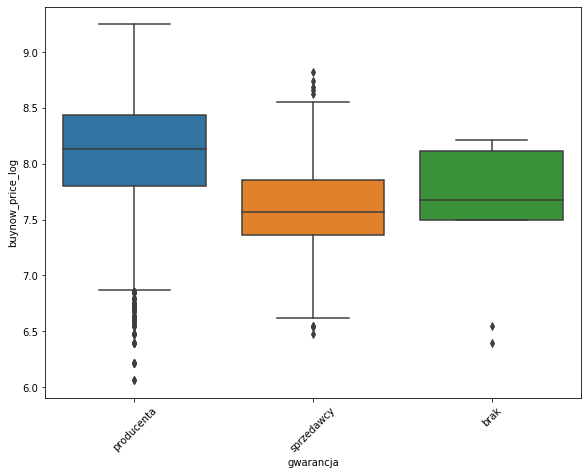

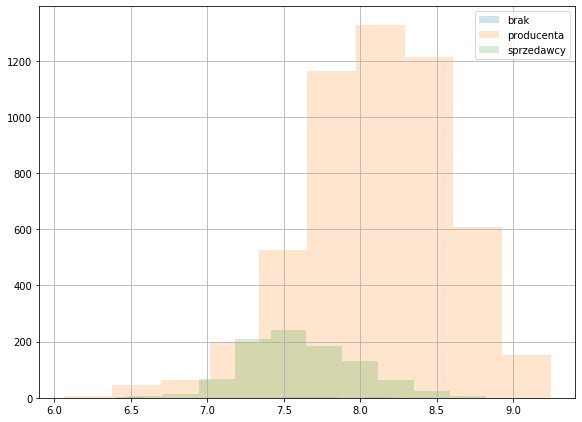

,min,mean,p01,p25,median,p75,p99,max,count
gwarancja,,,,,,,,,
producenta,429.0,3682.817699,835.65,2449.0,3399.0,4599.0000,8597.5000,10369.27,5306.0
sprzedawcy,649.0,2174.643650,873.57,1573.5,1939.0,2588.9025,4919.6469,6773.91,948.0
brak,600.0,2266.808182,609.90,1799.5,2159.7,3334.7450,3664.0000,3699.00,11.0


In [58]:
insepctVariable(dataset_train,'gwarancja')
# one hot encoding

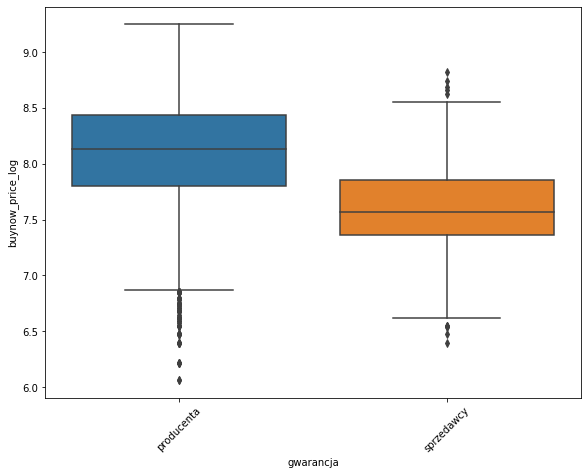

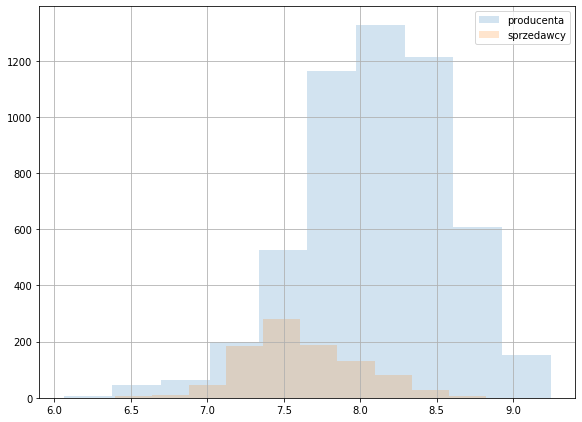

,min,mean,p01,p25,median,p75,p99,max,count
gwarancja,,,,,,,,,
producenta,429.0,3682.817699,835.65,2449.0,3399.0,4599.0,8597.5000,10369.27,5306.0
sprzedawcy,600.0,2175.700803,840.60,1575.0,1940.0,2589.0,4914.9466,6773.91,959.0


In [59]:
insepctVariable(dataset_train.replace({'gwarancja': {'brak': 'sprzedawcy'} }),'gwarancja')

### wielkość matrycy

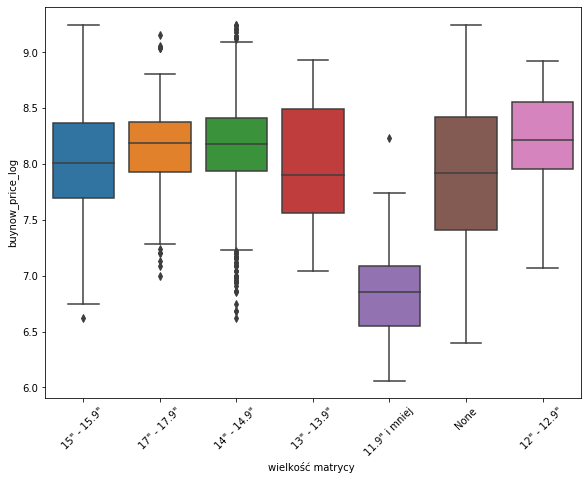

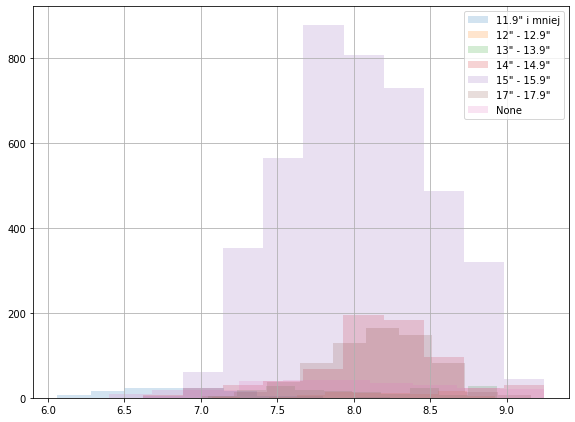

,min,mean,p01,p25,median,p75,p99,max,count
wielkość matrycy,,,,,,,,,
"15"" - 15.9""",750.0,3422.400325,1199.0000,2199.0000,2999.0,4319.0000,7988.000,10369.27,4250.0
"14"" - 14.9""",750.0,3787.349395,996.2000,2800.0625,3579.0,4488.3400,9695.280,10350.00,694.0
"17"" - 17.9""",1099.0,3664.653900,1455.0000,2781.5000,3599.0,4336.0000,6699.000,9499.00,682.0
None,600.0,3413.722446,699.0000,1649.0000,2750.0,4531.4825,10180.000,10330.00,278.0
"13"" - 13.9""",1149.0,3565.646168,1297.2400,1921.4150,2699.0,4899.0000,7599.000,7599.00,167.0
"11.9"" i mniej",429.0,1030.266446,443.0000,699.0000,949.0,1199.0000,2279.250,3769.00,121.0
"12"" - 12.9""",1179.9,3910.574932,1669.0248,2851.6200,3699.0,5199.0000,6662.204,7498.52,73.0


In [60]:
insepctVariable(dataset_train,'wielkość matrycy ')
# one hot encoding

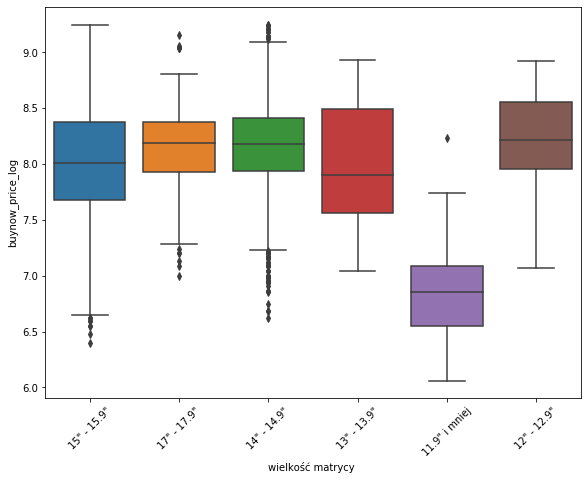

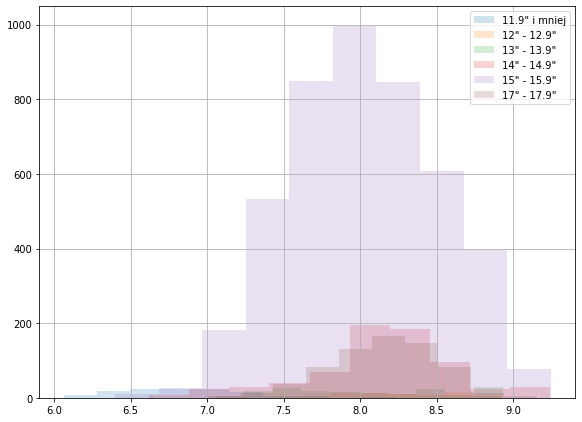

,min,mean,p01,p25,median,p75,p99,max,count
wielkość matrycy,,,,,,,,,
"15"" - 15.9""",600.0,3421.867540,1139.2673,2169.0000,2999.0,4339.00,8296.300,10369.27,4528.0
"14"" - 14.9""",750.0,3787.349395,996.2000,2800.0625,3579.0,4488.34,9695.280,10350.00,694.0
"17"" - 17.9""",1099.0,3664.653900,1455.0000,2781.5000,3599.0,4336.00,6699.000,9499.00,682.0
"13"" - 13.9""",1149.0,3565.646168,1297.2400,1921.4150,2699.0,4899.00,7599.000,7599.00,167.0
"11.9"" i mniej",429.0,1030.266446,443.0000,699.0000,949.0,1199.00,2279.250,3769.00,121.0
"12"" - 12.9""",1179.9,3910.574932,1669.0248,2851.6200,3699.0,5199.00,6662.204,7498.52,73.0


In [61]:
insepctVariable(dataset_train.replace({'wielkość matrycy ': {None: '15" - 15.9"'} }),'wielkość matrycy ')

# Przygotowanie zbioru do modelowania

In [62]:
def unstackListColumns(data, _vars = ['sterowanie', 'multimedia']): 
    dataset = data.copy()
    # prepare dictionary with levels of _vars
    dlevels = dict()
    for var in _vars:
        dlevels[var] = list(set([s for x in dataset[var].values if x is not None for s in x]))

    lol = [dataset.loc[:,list(set(dataset.columns) - set(_vars))]]

    for var, levels in dlevels.items():
        for level in levels: 
            lol.append(pd.DataFrame({var + " "+ level: dataset[[var]].\
                  apply(lambda x: 0 if x[0] is None else (level in x.values[0])*1,  axis = 1)}))

    dataset1 = pd.concat(lol, axis=1, sort=False)
    dataset1 = dataset1.reindex(sorted(dataset1.columns), axis=1)
    
    return dataset1

def getNullIndexes(data, keys = None):
    dataset = data.copy()
    # number of nulls per row
    CountNullRowwise = dataset.isnull().sum(axis=1)
    # aggregate by the number of nulls 
    CountNullRowwiseAggregated = CountNullRowwise.value_counts().sort_index().to_dict()
    # print(CountNullRowwiseAggregated)
    
    # create dictionary where: key - number of nulls in row, value - index pointer
    CountNullRowwiseAggregatedIndexes = dict()
    for key in keys if keys is not None else CountNullRowwiseAggregated.keys():
        CountNullRowwiseAggregatedIndexes[key] = CountNullRowwise[CountNullRowwise == key].index
    
    return CountNullRowwiseAggregatedIndexes


def imputeExpertValues(data):
    dataset = data.copy()
    
    # komunikacja
    def fill_komunikacja(x):
        if x[0] is None: return [['wi-fi', 'bluetooth', 'lan 10/100/1000 mbps']]
        else: return x
        
    dataset[['komunikacja']] = dataset[['komunikacja']].apply(lambda x: fill_komunikacja(x), axis = 1)

    dataset = unstackListColumns(dataset, ['komunikacja', 'multimedia'])
    
    # rozdzielczość (piksele)
    def map_resolution(x):
        # print(x[0])
        if x[0] is None: 
            return '1920 x 1080'
        elif x[0] in ['1920 x 1080','1366 x 768', '1600 x 900','3840 x 2160','1920 x 1280', '1280 x 800']:
            return x
        else: 
            return 'inna'
    
    dataset['rozdzielczość (piksele)'] = dataset[['rozdzielczość (piksele)']].apply(lambda x: map_resolution(x), axis = 1)
        
    def ram_convert_mb(x):
        if x is None: return None
        if str.lower(str.split(x," ")[1]) == 'gb' : 
            return np.int(str.split(x," ")[0])*1024
        else:
            return np.int(str.split(x," ")[0])
    
    dataset['wielkość pamięci ram'] = dataset.apply(lambda x: ram_convert_mb(x['wielkość pamięci ram']), axis = 1)
    # median_ram = dataset_train['wielkość pamięci ram (mb)'].median();  # median_ram = 8192.0
    dataset.replace({'wielkość pamięci ram': {np.nan: 8192.0}}, inplace = True)
    
    dataset_train['system operacyjny len'] = dataset_train[['system operacyjny']].apply(lambda x: len(x[0])  if x[0] is not None else 0, axis = 1 ).value_counts()
        
    for value in ['professional', 'home', '10', '8', '7']: 
        dataset['system operacyjny ' + str(value)] = dataset[['system operacyjny']].\
        apply(lambda x:  1*any([value in item for item in x[0]]) if x[0] is not None else 0, axis = 1 )
      
   
    def map_system(x):
        if x[0] is None: 
            return 'windows 10 home'
        else:
            if 'windows 10 home' in x[0]:
                return 'windows 10 home'
            elif 'windows 10 professional' in x[0]:
                return 'windows 10 professional'
            elif 'windows 7 professional 64-bit' in x[0]:
                return 'windows 7 professional 64-bit'
            elif 'windows 8.1 home 64-bit' in x[0]:
                return 'windows 8.1 home 64-bit'
            elif 'brak systemu' in x[0]:
                return 'brak systemu'
            else: return 'inny system'
            
            
    dataset['system operacyjny'] = dataset[['system operacyjny']].apply(lambda x: map_system(x), axis = 1 )
    
    # for value in ['amd', 'celeron', 'pentium']: 
    #     dataset['seria procesora ' + str(value)] = dataset[['seria procesora']].\
    #           apply(lambda x: 1*(value in x[0]) if x[0] is not None else 0, axis = 1 )
    
    dataset['klawiatura podświetlana flag'] = dataset[['sterowanie']].apply(lambda x:  ('klawiatura podświetlana' in x[0])*1 if x[0] is not None else 0, axis = 1) 
    dataset['klawiatura numeryczna flag'] = dataset[['sterowanie']].apply(lambda x:  ('klawiatura numeryczna' in x[0])*1 if x[0] is not None else 0, axis = 1) 
    
    dataset.drop(columns = ['sterowanie'], inplace = True)
    
    dataset.replace({'rodzaj karty graficznej': {None: 'grafika zintegrowana'},
                     'liczba rdzeni procesora': {None: 4},
                     'liczba rdzeni procesora': {3: 4},
                     'typ dysku twardego': {None: 'hdd'},
                     'typ pamięci ram': {None: 'ddr3'},  
                     'seria procesora': {None: 'intel core i3'},
                     'taktowanie bazowe procesora (ghz)': {np.nan: 2.5},
                     'pojemność dysku (gb)': {10000: 1000, np.nan: 500 ,0: 500},
                     'gwarancja': {None: 'sprzedawcy'},
                     'wielkość matrycy ': {None: '15" - 15.9"'}
                    }, inplace = True)
    
    return dataset.reindex(sorted(dataset.columns), axis=1)


In [63]:
#for col in X_train.columns:
def prepareData(data): 
    dataset = data.copy()
    # dodanie flagi null
    for col in dataset.columns:
        if dataset[col].dtype == 'float64': 
            dataset[col+"_flg"] = dataset[col].apply(lambda x: 1 if np.isnan(x) else 0 )
        else: 
            dataset[col+"_flg"] = dataset[col].apply(lambda x: 1 if x is None else 0 )
    
    # dodanie informacji o ilości nulli w wierszu
    dataset.loc[:,'>=8 nulli wiersz'] = 0 
    dataset.loc[list(np.concatenate([v.values for i,v in getNullIndexes(dataset,[8,9,10,11,12,13,14]).items()])),'>=8 nulli wiersz'] = 1
    
    dataset.loc[:,'>=3 nulli wiersz'] = 0 
    dataset.loc[list(np.concatenate([v.values for i,v in getNullIndexes(dataset,[3,4,5,6,7,8,9,10,11,12,13,14]).items()])),'>=3 nulli wiersz'] = 1
    
    
    dataset = imputeExpertValues(dataset)
    
    return dataset


In [64]:
print(X_train.shape, y_train.shape)
X_train = X_train.loc[list(set(X_train.index) - set(outliers_indexes)),]
y_train = y_train.loc[list(set(X_train.index) - set(outliers_indexes)),]
print(X_train.shape, y_train.shape)

(6282, 16) (6282,)
(6265, 16) (6265,)


In [65]:
X_train_prepared = prepareData(X_train)
X_test_prepared = prepareData(X_test)
hidden_prepared = prepareData(hidden)

In [66]:
X_train_prepared_dummies = pd.get_dummies(X_train_prepared, drop_first=True) 
X_test_prepared_dummies  = pd.get_dummies(X_test_prepared, drop_first=True) 
hidden_prepared_dummies  = pd.get_dummies(hidden_prepared, drop_first=True) 

In [67]:
print(X_train_prepared_dummies.drop(columns = ['liczba rdzeni procesora_8']).shape)
print(X_test_prepared_dummies.drop(columns = ['liczba rdzeni procesora_6','liczba rdzeni procesora_8']).shape)
print(hidden_prepared_dummies.shape)

# (6269, 94)
# (1568, 94)
# (3869, 94)

(6265, 91)
(1571, 91)
(3869, 91)


In [68]:
y_train.shape, y_test.shape

((6265,), (1571,))

In [69]:
y_train

0        5524.0
4        2479.0
5        1949.0
7        3329.0
10       1720.0
          ...  
11713    4099.0
11714    3899.0
11715    3340.0
11717    3499.0
11719    4949.0
Name: buynow_price, Length: 6265, dtype: float64

In [70]:
laptops = {'train': {'X': X_train,
                 'X_imputed':X_train_prepared,
                 'X_dummies': X_train_prepared_dummies.drop(columns = ['liczba rdzeni procesora_8']),
                 'y': y_train},
           'test': {'X': X_test,
                    'X_imputed':y_test,
                    'X_dummies':X_test_prepared_dummies.drop(columns = ['liczba rdzeni procesora_6','liczba rdzeni procesora_8']),
                    'y':y_test},
           'oot': {'X': hidden,
                    'X_imputed':hidden_prepared,
                    'X_dummies':hidden_prepared_dummies}}

In [71]:
import pickle
with open('laptops.pickle', 'wb') as handle:
    pickle.dump(laptops, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [75]:
set(X_train_prepared_dummies.columns) - set(X_test_prepared_dummies.columns)  
# set(X_train_prepared_dummies.columns)  - set(hidden_prepared_dummies.columns)  

set()

In [73]:
set(X_test_prepared_dummies.columns)  - set(X_train_prepared_dummies.columns) 

{'liczba rdzeni procesora_6'}

In [74]:
from skopt import BayesSearchCV
import xgboost as xgb

opt1 = BayesSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', n_jobs=4),
    {
        'n_estimators': (10, 150),
        'max_depth': (15, 20),
        'learning_rate': (0.001, 0.99, "log-uniform"),
        'min_child_weight': (7, 11)
        #'lambda': (0.1,1),
        #'alfa': (0.1,1)
    },
    n_iter=10, 
    verbose=99,
    cv = 3,
    random_state=1234
)

opt1.fit(laptops['train']['X_dummies'], np.log(y_train))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.01708110501978804, max_depth=20, min_child_weight=8, n_estimators=127 
[CV]  learning_rate=0.01708110501978804, max_depth=20, min_child_weight=8, n_estimators=127, score=-2.050, total=   1.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[CV] learning_rate=0.01708110501978804, max_depth=20, min_child_weight=8, n_estimators=127 
[CV]  learning_rate=0.01708110501978804, max_depth=20, min_child_weight=8, n_estimators=127, score=-2.172, total=   1.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[CV] learning_rate=0.01708110501978804, max_depth=20, min_child_weight=8, n_estimators=127 
[CV]  learning_rate=0.01708110501978804, max_depth=20, min_child_weight=8, n_estimators=127, score=-2.284, total=   1.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.2s 

[CV]  learning_rate=0.02278289642028662, max_depth=19, min_child_weight=10, n_estimators=62, score=-13.070, total=   0.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s finished
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] learning_rate=0.0045089428151679385, max_depth=16, min_child_weight=7, n_estimators=120 
[CV]  learning_rate=0.0045089428151679385, max_depth=16, min_child_weight=7, n_estimators=120, score=-75.540, total=   1.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[CV] learning_rate=0.0045089428151679385, max_depth=16, min_child_weight=7, n_estimators=120 
[CV]  learning_rate=0.0045089428151679385, max_depth=16, min_child_weight=7, n_estimators=120, score=-78.269, total=   1.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining: 

BayesSearchCV(cv=3, error_score='raise',
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_e...
                                     validate_parameters=False,
                                     verbosity=None),
              fit_params=None, iid=True, n_iter=10, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=1234,
         

In [76]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_error
y_train_pred = opt1.best_estimator_.predict(laptops['train']['X_dummies'])

mse_train = mean_squared_error(laptops['train']['y'], np.exp(y_train_pred))
np.sqrt(mse_train)


y_test_pred = opt1.best_estimator_.predict(laptops['test']['X_dummies'])
mse_test = mean_squared_error(laptops['test']['y'], np.exp(y_test_pred))
 
np.sqrt(mse_train), np.sqrt(mse_test)

# (408.44392837070814, 553.2393230601942)

(407.42158139718003, 559.7722487037252)

In [110]:
pd.DataFrame(opt1.cv_results_)

,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params
0,-2.049586,-2.171944,-2.283913,-2.168462,0.095699,4,1.736492,0.063135,0.023085,0.005773,0.017081,20,8,127,"{'learning_rate': 0.01708110501978804, 'max_de..."
1,-1.183161,-1.270225,-1.358148,-1.270497,0.071441,3,2.063766,0.028769,0.019666,0.001699,0.015766,16,10,149,"{'learning_rate': 0.015765987962647336, 'max_d..."
2,-27.973990,-29.014199,-29.687682,-28.891811,0.704970,6,1.540694,0.133371,0.016891,0.000976,0.008154,19,7,126,"{'learning_rate': 0.008154001210476543, 'max_d..."
3,0.885966,0.881060,0.884693,0.883907,0.002079,2,4.812874,0.006364,0.037334,0.001246,0.411962,17,8,140,"{'learning_rate': 0.41196237500069377, 'max_de..."
4,-41.084504,-42.593166,-43.533658,-42.403565,1.008849,7,1.089576,0.020826,0.016991,0.000818,0.008154,19,9,103,"{'learning_rate': 0.008153811493390952, 'max_d..."
5,0.883481,0.883092,0.888904,0.885159,0.002653,1,2.907753,0.148966,0.027334,0.001246,0.331337,17,10,82,"{'learning_rate': 0.3313368845517676, 'max_dep..."
6,-119.585484,-123.850732,-126.303473,-123.245979,2.775845,10,0.261514,0.003102,0.016333,0.001247,0.014841,17,9,21,"{'learning_rate': 0.014840706165573222, 'max_d..."
7,-12.227915,-12.719386,-13.069552,-12.672213,0.345225,5,0.755040,0.019399,0.018332,0.001247,0.022783,19,10,62,"{'learning_rate': 0.02278289642028662, 'max_de..."
8,-75.539526,-78.269254,-79.877765,-77.895139,1.790792,8,1.192732,0.017152,0.017666,0.001702,0.004509,16,7,120,"{'learning_rate': 0.0045089428151679385, 'max_..."
9,-104.187552,-107.918547,-110.073623,-107.392729,2.431661,9,1.459611,0.051652,0.017308,0.000489,0.002564,16,8,149,"{'learning_rate': 0.002564353119439986, 'max_d..."


In [112]:
pd.DataFrame(zip(laptops['train']['X_dummies'].columns, opt1.best_estimator_.feature_importances_)).sort_values(by = 1, ascending= False).head(20)

,0,1
4,klawiatura podświetlana flag,0.248681
52,rozdzielczość (piksele)_1366 x 768,0.101992
70,seria procesora_intel core i7,0.060421
56,rozdzielczość (piksele)_3840 x 2160,0.058419
85,typ pamięci ram_ddr4,0.055097
78,system operacyjny_windows 7 professional 64-bit,0.049740
36,system operacyjny professional,0.030489
50,liczba rdzeni procesora_nie dotyczy,0.030062
47,liczba rdzeni procesora_2,0.025096
69,seria procesora_intel core i5,0.022563


In [134]:
laptops['train']['X_dummies'].loc[[11713],'klawiatura podświetlana flag'] # 1 
laptops['train']['y'][11713] # 4099.0
np.exp(opt1.best_estimator_.predict(laptops['train']['X_dummies'].loc[[11713],:].replace({'klawiatura podświetlana flag':{1:0}})))
# 3430.3157

# spadek o 600

array([3430.3157], dtype=float32)

In [141]:
# 10740
laptops['test']['X_dummies'].loc[[10740],'klawiatura podświetlana flag'] # 0
laptops['test']['y'][10740] # 1949.0
np.exp(opt1.best_estimator_.predict(laptops['test']['X_dummies'].loc[[10740],:])) # 2324.0479
np.exp(opt1.best_estimator_.predict(laptops['test']['X_dummies'].loc[[10740],:].replace({'klawiatura podświetlana flag':{0:1}})))
# 2647.741


array([2647.741], dtype=float32)

In [78]:
opt1.best_estimator_
# XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints=None,
#              learning_rate=0.3313368845517676, max_delta_step=0, max_depth=17,
#              min_child_weight=10, missing=nan, monotone_constraints=None,
#              n_estimators=82, n_jobs=4, num_parallel_tree=1,
#              objective='reg:squarederror', random_state=0, reg_alpha=0,
#              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
#              validate_parameters=False, verbosity=None)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.3313368845517676, max_delta_step=0, max_depth=17,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=82, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [144]:
with open('opt1.pickle', 'wb') as handle:
    pickle.dump(opt1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [79]:
opt1.best_params_

# OrderedDict([('learning_rate', 0.3313368845517676),
#              ('max_depth', 17),
#              ('min_child_weight', 10),
#              ('n_estimators', 82)])

OrderedDict([('learning_rate', 0.3313368845517676),
             ('max_depth', 17),
             ('min_child_weight', 10),
             ('n_estimators', 82)])

In [80]:
preds = laptops['oot']['X_dummies'].assign(pred = np.exp(opt1.best_estimator_.predict(laptops['oot']['X_dummies'])))[['pred']]

In [81]:
preds = laptops['oot']['X'].assign(pred = np.exp(opt1.best_estimator_.predict(laptops['oot']['X_dummies']))) 

In [96]:
insepctVariable(pd.concat([laptops['test']['X'], laptops['test']['y']], axis = 1), 'rodzaj karty graficznej', 0,0, 'buynow_price','buynow_price')

,min,mean,p01,p25,median,p75,p99,max,count
rodzaj karty graficznej,,,,,,,,,
grafika dedykowana,1199.0,4139.227740,1570.8,3049.2575,3899.0,4906.5,8771.0,11013.87,854.0
grafika zintegrowana,599.0,2593.659206,649.0,1649.0000,2199.0,2999.0,8135.0,10850.00,617.0
None,509.0,3226.950900,697.1,1778.1750,2599.0,3628.5,10796.2,11410.00,100.0


In [93]:
insepctVariable(preds, 'rodzaj karty graficznej', 0,0, summary_var = 'pred', plots_var = 'pred')

,min,mean,p01,p25,median,p75,p99,max,count
rodzaj karty graficznej,,,,,,,,,
grafika dedykowana,949.165039,4033.415527,1516.197021,2936.912354,3915.974609,4864.575195,8055.561523,9993.251953,2173.0
grafika zintegrowana,478.476715,2638.438721,705.669067,1762.929077,2328.768066,3063.003174,7948.710449,10365.217773,1441.0
None,726.386536,2907.891113,1045.171631,2059.198730,2400.731689,3392.421143,6799.575684,6967.936035,255.0


In [97]:
insepctVariable(pd.concat([laptops['test']['X'], laptops['test']['y']], axis = 1), 'seria procesora', 0,0, 'buynow_price','buynow_price')

,min,mean,p01,p25,median,p75,p99,max,count
seria procesora,,,,,,,,,
intel core i5,1489.00,3765.500214,1602.9600,2838.0000,3599.00,4349.0000,8066.0000,10850.00,513.0
intel core i7,1699.00,4815.754934,1899.0000,3756.7500,4499.00,5599.0000,9192.9300,11013.87,458.0
intel core i3,1199.00,2347.034928,1338.0000,1964.9325,2304.00,2699.0000,3751.5000,4000.00,276.0
None,509.00,2880.976091,706.2900,1689.2500,2312.86,3051.5000,10739.6000,11410.00,110.0
intel pentium dual-core,799.00,2118.131000,955.0000,1689.0000,1874.00,2566.5075,3643.0061,3799.01,40.0
amd a6,1199.00,1772.257143,1246.6000,1599.0000,1699.00,1914.0000,2499.0000,2499.00,35.0
intel celeron dual-core,599.00,1241.420294,632.0000,1162.0825,1249.00,1399.0000,1784.9800,1849.00,34.0
intel celeron,675.00,1384.600333,718.5000,1099.0000,1353.00,1486.5000,2791.0000,2849.00,30.0
intel pentium quad-core,1299.00,1615.640476,1307.0000,1473.0000,1579.00,1799.0000,1996.7280,2021.66,21.0


In [98]:
insepctVariable(preds, 'seria procesora', 0,0, summary_var = 'pred', plots_var = 'pred')

,min,mean,p01,p25,median,p75,p99,max,count
seria procesora,,,,,,,,,
intel core i5,1094.333130,3526.880615,1535.783081,2741.624268,3401.927734,4093.634766,7075.428223,8081.745117,1258.0
intel core i7,1749.094727,4760.673828,2017.279663,3780.298828,4527.386230,5683.331055,8707.330078,10365.217773,1199.0
intel core i3,1102.146973,2356.947998,1319.481812,1982.718506,2343.276123,2728.114258,3564.316406,3982.409668,646.0
None,709.064331,2828.199219,1047.976685,2184.775635,2408.421387,3106.657471,6799.575684,6967.936035,278.0
amd a6,1213.534668,1797.292236,1299.944580,1548.926025,1719.255981,1909.243896,2893.781250,3107.205811,110.0
intel pentium dual-core,1209.809204,2149.042236,1287.360962,1666.517822,2046.325684,2512.897705,3770.777588,3786.483154,80.0
intel celeron dual-core,785.485291,1266.871460,785.485291,1133.708984,1292.255005,1399.191895,1739.505615,1743.468994,79.0
intel celeron,862.727112,1436.505371,871.832825,1294.853394,1382.980469,1589.265869,2181.036377,2291.302002,44.0
intel pentium quad-core,1267.371704,1720.867798,1307.749268,1521.619995,1730.349854,1869.492554,2249.014160,2283.037598,42.0


In [100]:
insepctVariable(pd.concat([laptops['test']['X'], laptops['test']['y']], axis = 1), 'wielkość matrycy ', 0,0, 'buynow_price','buynow_price')

,min,mean,p01,p25,median,p75,p99,max,count
wielkość matrycy,,,,,,,,,
"15"" - 15.9""",1049.00,3448.584848,1276.9455,2194.0000,3074.00,4349.0000,8517.2500,9749.00,1056.0
"14"" - 14.9""",699.00,3919.816845,799.0000,2744.0000,3729.00,4668.1350,9610.4216,10850.00,187.0
"17"" - 17.9""",1199.00,3616.631557,1265.0000,2639.0000,3539.00,4434.0000,6633.0000,11013.87,167.0
None,509.00,3411.349688,628.7000,1624.8025,2339.00,3706.2500,11019.4000,11410.00,64.0
"13"" - 13.9""",1449.00,3604.235952,1449.0000,1969.0000,3099.00,4745.4625,7599.0000,7599.00,42.0
"11.9"" i mniej",599.00,1011.597143,599.0000,662.0000,949.00,1199.0000,2099.4660,2125.00,35.0
"12"" - 12.9""",1859.24,3704.215000,1859.2400,2817.6125,3949.57,4561.7500,5694.8800,5799.00,20.0


In [101]:
insepctVariable(preds, 'wielkość matrycy ', 0,0, summary_var = 'pred', plots_var = 'pred')

,min,mean,p01,p25,median,p75,p99,max,count
wielkość matrycy,,,,,,,,,
"15"" - 15.9""",926.537720,3419.747803,1216.117432,2214.664307,2980.042725,4349.180664,7913.376465,9993.251953,2625.0
"17"" - 17.9""",1126.430176,3630.041748,1397.894287,2886.877686,3578.251709,4288.700195,6366.006348,6909.532227,423.0
"14"" - 14.9""",787.846619,3752.812012,1114.701660,2787.581055,3681.582764,4391.841309,9021.143555,10365.217773,422.0
None,1180.487549,3084.433594,1270.175415,2269.854248,2551.196045,4995.784668,6799.575684,7569.886719,170.0
"13"" - 13.9""",1223.294556,3616.034180,1299.944458,1880.112427,3206.787109,4908.609863,7605.960449,8651.919922,122.0
"11.9"" i mniej",478.476715,1119.117432,496.440125,710.090820,1038.357910,1370.878540,2657.520020,3657.051270,66.0
"12"" - 12.9""",2039.009033,4212.450684,2097.792236,3193.325439,3996.570557,5079.783203,7152.351562,7316.624512,41.0


In [104]:
# (...)

,pred
1869,3111.466797
10212,1389.000977
7781,2031.187622
10562,3724.112305
4166,4105.076660
...,...
1795,3919.150391
3876,1772.251831
2591,3836.652832
1800,3247.788574


In [142]:
import shap
explainer = shap.TreeExplainer(opt1.best_estimator_)
shap_values = explainer.shap_values(laptops['train']['X_dummies'])

In [154]:
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], laptops['train']['X_dummies'].iloc[0,:] )
# shap.force_plot(explainer.expected_value, shap_values, X)

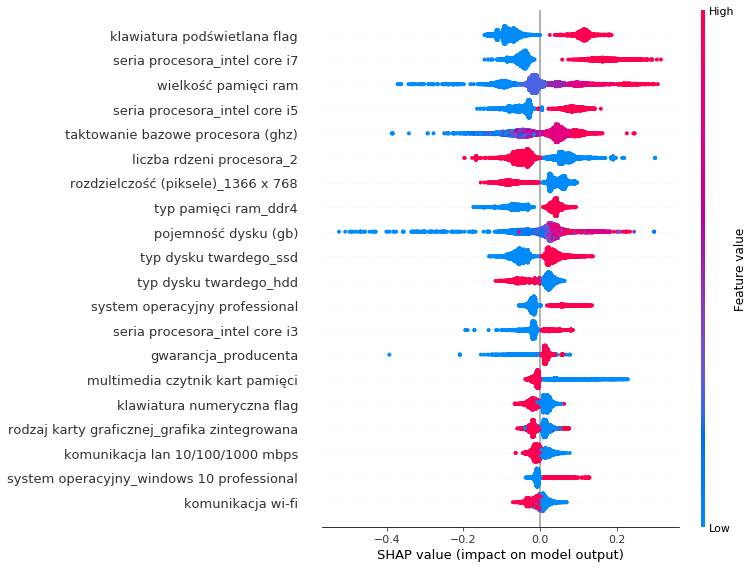

In [151]:
shap.summary_plot(shap_values, laptops['train']['X_dummies'])

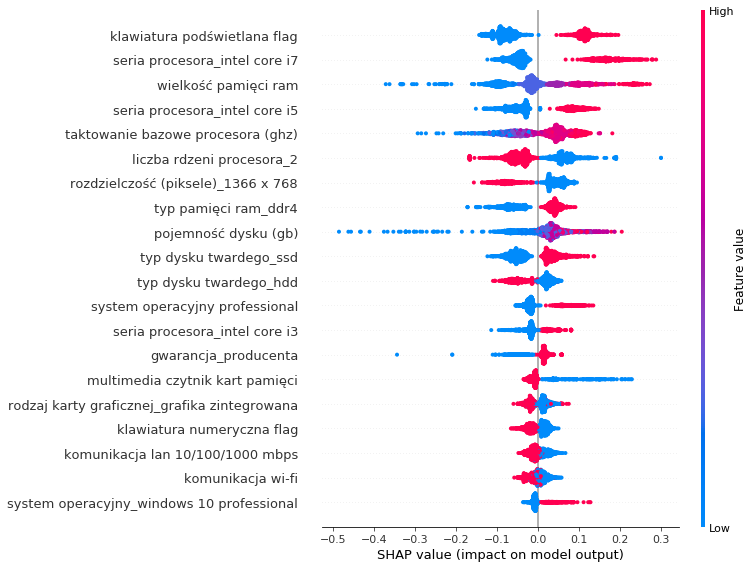

In [155]:
explainer_test = shap.TreeExplainer(opt1.best_estimator_)
shap_values_test = explainer_test.shap_values(laptops['test']['X_dummies'])

shap.summary_plot(shap_values_test, laptops['test']['X_dummies'])

In [105]:
with open('opt1_preds.pickle', 'wb') as handle:
    pickle.dump(preds[['pred']], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [140]:
# 
# opt2 = BayesSearchCV(
#     xgb.XGBRegressor(objective='reg:squarederror', n_jobs=4),# silent=1),
#     {
#         'learning_rate': (0.01, 0.4, 'log-uniform'),
#         'min_child_weight': (5,10),
#         'max_depth': (10, 50),
#         'max_delta_step': (0, 20),
#         'subsample': (0.01, 1.0, 'uniform'),
#         'colsample_bytree': (0.01, 1.0, 'uniform'),
#         'colsample_bylevel': (0.01, 1.0, 'uniform'),
#         'reg_lambda': (0.1, 1000, 'log-uniform'),
#         'reg_alpha': (0.1, 1.0, 'log-uniform'),
#         'gamma': (0.1, 0.5, 'log-uniform'),
#         #'min_child_weight': (0, 5),
#         'n_estimators': (70, 100),
#         'scale_pos_weight': (0.01, 500, 'log-uniform')
#     },
#     cv = 3,
#     # n_jobs = 1,
#     n_iter = 9,   
#     verbose = 99,
#     # refit = True,
#     random_state = 1234
# )
# 
# opt2.fit(X_train_prepared_dummies, np.log(y_train))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] colsample_bylevel=0.417322896138908, colsample_bytree=0.9051691017946866, gamma=0.1348497127985243, learning_rate=0.21792154258719748, max_delta_step=14, max_depth=49, min_child_weight=7, n_estimators=88, reg_alpha=0.7876101001543893, reg_lambda=207, scale_pos_weight=210, subsample=0.06415751635420602 
[CV]  colsample_bylevel=0.417322896138908, colsample_bytree=0.9051691017946866, gamma=0.1348497127985243, learning_rate=0.21792154258719748, max_delta_step=14, max_depth=49, min_child_weight=7, n_estimators=88, reg_alpha=0.7876101001543893, reg_lambda=207, scale_pos_weight=210, subsample=0.06415751635420602, score=0.709, total=   0.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[CV] colsample_bylevel=0.417322896138908, colsample_bytree=0.9051691017946866, gamma=0.1348497127985243, learning_rate=0.2179215425871

[CV]  colsample_bylevel=0.8741602897322824, colsample_bytree=0.3072486002667311, gamma=0.13704952976265264, learning_rate=0.3104646193909749, max_delta_step=2, max_depth=16, min_child_weight=7, n_estimators=78, reg_alpha=0.47967529204696135, reg_lambda=245, scale_pos_weight=186, subsample=0.1551523575418154, score=0.789, total=   0.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[CV] colsample_bylevel=0.8741602897322824, colsample_bytree=0.3072486002667311, gamma=0.13704952976265264, learning_rate=0.3104646193909749, max_delta_step=2, max_depth=16, min_child_weight=7, n_estimators=78, reg_alpha=0.47967529204696135, reg_lambda=245, scale_pos_weight=186, subsample=0.1551523575418154 
[CV]  colsample_bylevel=0.8741602897322824, colsample_bytree=0.3072486002667311, gamma=0.13704952976265264, learning_rate=0.3104646193909749, max_delta_step=2, max_depth=16, min_child_weight=7, n_estimators=78, reg_alpha=0.47967529204696135, reg_lambda=245, scale_pos_weight

[CV]  colsample_bylevel=0.45866372539685496, colsample_bytree=0.8560008970547328, gamma=0.3797226432670514, learning_rate=0.03893429589582739, max_delta_step=13, max_depth=42, min_child_weight=8, n_estimators=93, reg_alpha=0.2744727124267048, reg_lambda=754, scale_pos_weight=100, subsample=0.4496012420669719, score=-1.004, total=   0.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[CV] colsample_bylevel=0.45866372539685496, colsample_bytree=0.8560008970547328, gamma=0.3797226432670514, learning_rate=0.03893429589582739, max_delta_step=13, max_depth=42, min_child_weight=8, n_estimators=93, reg_alpha=0.2744727124267048, reg_lambda=754, scale_pos_weight=100, subsample=0.4496012420669719 
[CV]  colsample_bylevel=0.45866372539685496, colsample_bytree=0.8560008970547328, gamma=0.3797226432670514, learning_rate=0.03893429589582739, max_delta_step=13, max_depth=42, min_child_weight=8, n_estimators=93, reg_alpha=0.2744727124267048, reg_lambda=754, scale_pos_we

BayesSearchCV(cv=3, error_score='raise',
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_e...
                             'colsample_bytree': (0.01, 1.0, 'uniform'),
                             'gamma': (0.1, 0.5, 'log-uniform'),
                             'learning_rate': (0.01, 0.4, 'log-uniform'),
                             'max_delta_step': (0, 20), 'max_depth': (

In [150]:
(laptops['train']['y'].mean() - 560, laptops['train']['y'].mean() + 560)

(2892.1193583399795, 4012.1193583399795)

In [149]:
laptops['test']['y'].mean()

3474.145964353915